In [29]:
def searching(word,num):
    url = 'https://search.naver.com/search.naver?&where=news&query={keyword}&sm=tab_pge&sort=0&photo=0&field=0&reporter_article=&pd=0&ds=&de=&docid=&nso=so:r,p:all,a:all&mynews=0&cluster_rank=55&start={pagenum}&refresh_start=0'.format(keyword=word,pagenum=num)
    return url
    

In [12]:
print(searching("hi","01"))

https://search.naver.com/search.naver?&where=news&query=hi&sm=tab_pge&sort=0&photo=0&field=0&reporter_article=&pd=0&ds=&de=&docid=&nso=so:r,p:all,a:all&mynews=0&cluster_rank=55&start=01&refresh_start=0


In [35]:
def select_first(driver):
    
    driver.implicitly_wait(10)
    
    first = driver.find_element_by_class_name('eLAPa')
    print("첫게시물클릭햇다")
    first.click()
    time.sleep(3)

In [ ]:
# 네이버 뉴스 1페이지
# https://search.naver.com/search.naver?&where=news&query=%EC%A3%BC%EC%8B%9D&sm=tab_pge&sort=0&photo=0&field=0&reporter_article=&pd=0&ds=&de=&docid=&nso=so:r,p:all,a:all&mynews=0&cluster_rank=55&start=1&refresh_start=0
# 네이버 뉴스 2페이지
# https://search.naver.com/search.naver?&where=news&query=%EC%A3%BC%EC%8B%9D&sm=tab_pge&sort=0&photo=0&field=0&reporter_article=&pd=0&ds=&de=&docid=&nso=so:r,p:all,a:all&mynews=0&cluster_rank=87&start=11&refresh_start=0

In [87]:
def html2text(html):
    soup = BeautifulSoup(html)
    text_parts = soup.findAll(text=True)
    print(''.join(text_parts))
    return ''.join(text_parts)

In [42]:
import re

def get_content(driver):
    html = driver.page_source
#     html2text(html)
    soup = BeautifulSoup(html, 'lxml')
    BeautifulSoup(html)
    content = []
    try:
        list = soup.select('ul.list_news div.dsc_wrap a')
        titlist = soup.select('ul.list_news a.news_tit')
#         print(list[0])
        print(len(list))
        for a in range(len(list)):
            href = list[a].get_text()
            text = list[a].attrs["href"]
            print(text, ":", href)
        print(len(titlist))
#         for i in alllist:
#             content[i]["title"] = alllist 
        
        
    except:
        content = []
        print(content,"except")
        
    
#     tags = re.findall(r'#[^\s#,\\]+', content)  
#     date = soup.select('time._1o9PC.Nzb55')[0]['datetime'][:10]
#     try:
#         like = soup.select('div.Nm9Fw > button')[0].text[4:-1]   
#     except:
#         like = 0
#     try: 
#         place = soup.select('div.M30cS')[0].text
#     except:
#         place = ''
#     data = [content, date, like, place, tags]
#     return data


In [37]:
def move_next(driver):

    driver.implicitly_wait(10)
    
    right = driver.find_element_by_css_selector ('a.coreSpriteRightPaginationArrow')
    right.click()
    time.sleep(3)

In [77]:
from selenium import webdriver
from bs4 import BeautifulSoup
import time
import re

options = webdriver.ChromeOptions()

# headless 옵션 설정
options.add_argument('headless')
options.add_argument("no-sandbox")

# 브라우저 윈도우 사이즈
options.add_argument('window-size=1920x1080')

# 사람처럼 보이게 하는 옵션들
options.add_argument("disable-gpu")   # 가속 사용 x
options.add_argument("lang=ko_KR")    # 가짜 플러그인 탑재
options.add_argument('user-agent=Mozilla/5.0 (Macintosh; Intel Mac OS X 10_12_6) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/61.0.3163.100 Safari/537.36')  # user-agent 이름 설정

driver = webdriver.Chrome('./webdriver/chromedriver_win32/chromedriver.exe') 
usr = 'rkddpdms12'
pwd = open('./newspass.txt').readline()
word = "주식"

url = searching(word,"01")
driver.implicitly_wait(3)
driver.get(url)
time.sleep(3)
get_content(driver)

# driver.find_element_by_css_selector('div.dsc_wrap').click()

# time.sleep(5)
# # print(driver.window_handles)


# get_content(driver)



# driver.switch_to.window(driver.window_handles[-1])
# driver.close()
# time.sleep(1)


# driver.find_element_by_css_selector('body > div.RnEpo.Yx5HN > div > div > div > div.mt3GC > button.aOOlW.HoLwm').click()
# print(url,"url")
# print("첫게시물 등장")

# driver.get(url)
# select_first(driver)

# results = [ ]

# target = 50
# for i in range(target):
#     data = get_content(driver)
#     results.append(data)
#     move_next(driver)

# print(results[:2])

0
0


In [52]:

import pandas as pd

results_df = pd.DataFrame(results)
results_df.columns = ['content','data','like','place','tags']
results_df.to_excel('./files/오늘뭐먹지.xlsx')

In [42]:
pohang_insta_df = pd.DataFrame( [ ] )

folder = './files/'

f_list = ['kimseonho.xlsx']

for fname in f_list:
    fpath = folder + fname
    temp = pd.read_excel(fpath)
    pohang_insta_df = pohang_insta_df.append(temp)

pohang_insta_df.columns =['','content','data','like','place','tags']


In [43]:
pohang_insta_df.drop_duplicates(subset = [ "content"] , inplace = True)
pohang_insta_df.to_excel('./files/test_crawling_raw.xlsx', index = False)

In [41]:
from bs4 import BeautifulSoup
import requests
import re

# url = searching("주식","01")
url = "https://view.asiae.co.kr/article/2021031610195729346"
res = requests.get(url)
soup = BeautifulSoup(res.text,'html.parser')

for script in soup.find_all('script'):
    script.extract()

str1 = soup.get_text();
str1 = cleanText(str1)
# print(str1)
# print(str1.replace("\n","A").replace("\r","B").replace("\t","C"))
str2 = "하나금융투자(대표이사 이진국)는 5월28일까지 해외주식 적립식 서비스를 이용하는 손님을 대상으로 경품을 제공하는 ‘엄마, 아빠 해외주식 사주세요’ 이벤트를 진행한다고 16일 밝혔다."
str2 = cleanText(str2)
start = 0
for a in re.finditer(str2,str1):
    start = a.start()
    print(start,"start")
restr = str1[start:]
# print(start,"start")
end=restr.find("기자")
restr = restr[:end]
print(restr)


1868 start
하나금융투자대표이사 이진국는 5월28일까지 해외주식 적립식 서비스를 이용하는 손님을 대상으로 경품을 제공하는 엄마 아빠 해외주식 사주세요’ 이벤트를 진행한다고 16일 밝혔다 





썝蹂몃낫湲 븘씠肄

해외주식 적립식 서비스는 미국주식 또는 ETF 상품을 최대 5종목 이내에서 지정해 매달 또는 매주 정해진 날짜에 설정한 금액만큼 자동으로 매수할 수 있는 서비스다 미국 주식을 정기적으로 환전 없이 쉽고 편리하게 매수할 수 있는 장점이 있다 미국주식 장기투자를 원하는 투자자는 물론 자녀에게 정기적으로 주식을 사주고 싶어 하는 손님을 위한 서비스다 이번 이벤트는 적립식 서비스를 통해 3달 동안 매달 30만원 이상 미국주식 혹은 ETF를 매수하면 자동으로 참여할 수 있다 선착순 500명에게 5만원 상당의 백화점 모바일 상품권을 제공하고 추가로 추첨을 통해 100명에게 디즈니10명’ 애플30명’ 코카콜라60명’ 등의 미국 주식을 1주씩 지급한다	

신규 계좌개설 손님뿐만 아니라 기존 하나금융투자 계좌를 보유하고 있는 손님 모두 이벤트에 참여할 수 있다조일환 하나금융투자 BK추진본부장은 “최근 국내주식뿐만 아니라 해외주식 거래에 대한 투자자들의 관심과 열기가 고조되고 있는 가운데 특히 미국주식에 대한 수요가 폭증하고 있다”며 “하나금융투자는 미국주식을 매매하는 손님에게 보다 다양한 서비스를 제공하고자 미국주식 적립식 서비스 이벤트를 마련했다”고 말했다엄마 아빠 해외주식 사주세요’ 이벤트에 대한 자세한 사항은 하나금융투자 홈페이지나 하나금융투자 모바일 어플리케이션MTS 원큐프로’에서 확인할 수 있다	

 
    
지연진 


In [40]:
def cleanText(readData):
    #텍스트에 포함되어 있는 특수 문자 제거
    text = re.sub('[-=+,#/\?:^$.@*\"※~&amp;%ㆍ!』\\‘|\(\)\[\]\&lt;\&gt;`\'…》]','',readData)
    return text




인터파크, 주식 서적 판매량 5배↑ - ZDNet korea













































.targetpushAd_pc_wrap {margin:0;padding:0;-webkit-tap-highlight-color:rgba(0,0,0,0);z-index:999999998;}.targetpushAd_pc_wrap div, .targetpushAd_pc_wrap dl, .targetpushAd_pc_wrap dt, .targetpushAd_pc_wrap dd, .targetpushAd_pc_wrap ul, .targetpushAd_pc_wrap ol, .targetpushAd_pc_wrap li, .targetpushAd_pc_wrap h1, .targetpushAd_pc_wrap h2, .targetpushAd_pc_wrap h3, .targetpushAd_pc_wrap h4, .targetpushAd_pc_wrap h5, .targetpushAd_pc_wrap h6, .targetpushAd_pc_wrap pre, .targetpushAd_pc_wrap form, .targetpushAd_pc_wrap fieldset, .targetpushAd_pc_wrap input, .targetpushAd_pc_wrap p, .targetpushAd_pc_wrap blockquote, .targetpushAd_pc_wrap table, .targetpushAd_pc_wrap th, .targetpushAd_pc_wrap td, .targetpushAd_pc_wrap embed, .targetpushAd_pc_wrap object, .targetpushAd_pc_wrap textarea, .targetpushAd_pc_wrap a, .targetpushAd_pc_wrap img{padding:0;margin:0;}.targetpushAd_pc_wrap ol, .targetpushAd_pc_wrap ul, .targe
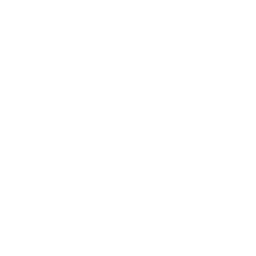
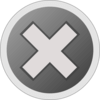
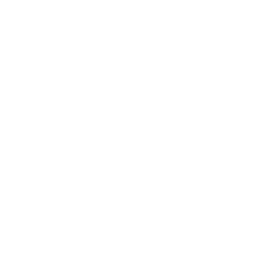
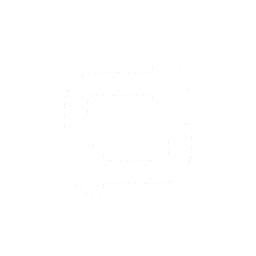
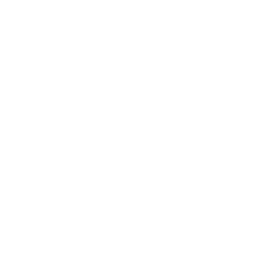

In [78]:
import requests
from selenium import webdriver
from bs4 import BeautifulSoup
import time
import re

options = webdriver.ChromeOptions()

# headless 옵션 설정
options.add_argument('headless')
options.add_argument("no-sandbox")

# 브라우저 윈도우 사이즈
options.add_argument('window-size=1920x1080')

# 사람처럼 보이게 하는 옵션들
options.add_argument("disable-gpu")   # 가속 사용 x
options.add_argument("lang=ko_KR")    # 가짜 플러그인 탑재
options.add_argument('user-agent=Mozilla/5.0 (Macintosh; Intel Mac OS X 10_12_6) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/61.0.3163.100 Safari/537.36')  # user-agent 이름 설정

driver = webdriver.Chrome('./webdriver/chromedriver_win32/chromedriver.exe') 

# res = requests.get("https://www.chosun.com/economy/2021/03/14/G47VELTHWVEF5BB727RO7GMXYM/?utm_source=naver&utm_medium=referral&utm_campaign=naver-news")
# soup = BeautifulSoup(res.text,'html.parser')

# print(soup)

# for script in soup.find_all('script'):
#     script.extract()

# str1 = soup.get_text();

url = "https://zdnet.co.kr/view/?no=20210315093140"
driver.implicitly_wait(3)
driver.get(url)
time.sleep(3)


import re

html = driver.page_source
# soup = BeautifulSoup(res.text, 'lxml')
# BeautifulSoup(html)
content = []
soup = BeautifulSoup(html,'html.parser')

# for script in soup.find_all('script'):
#     script.extract()
# for style in soup.find_all('style'):
#     style.extract()
str1 = soup.get_text();
print(str1)

In [2]:
import pandas as pd
import numpy as np

import platform
import matplotlib.pyplot as plt

from bs4 import BeautifulSoup 
from urllib.request import urlopen
import urllib
import time
from urllib.request import Request

%matplotlib inline

from matplotlib import rc
plt.rcParams['axes.unicode_minus']=False
rc('font', family='Malgun Gothic')

In [3]:
def searching(word,num):
    url = 'https://search.naver.com/search.naver?&where=news&query={keyword}&sm=tab_pge&sort=0&photo=0&field=0&reporter_article=&pd=0&ds=&de=&docid=&nso=so:r,p:all,a:all&mynews=0&cluster_rank=55&start={pagenum}&refresh_start=0'.format(keyword=word,pagenum=num)
    return url
    

In [5]:
def cleanText(readData):
    #텍스트에 포함되어 있는 특수 문자 제거
    text = re.sub('[-=+,#/\?:^$.*\"※~&amp;%ㆍ!』\\‘|\(\)\[\]\&lt;\&gt;`\'…》]','',readData)
    text = ' '.join(text.split())
    return text

In [6]:
def searchText(readData):
    #텍스트에 포함되어 있는 특수 문자 제거
    text = re.sub('[-=+,#/\?:^$*\"※~&amp;%ㆍ!』\\‘|\(\)\[\]\&lt;\&gt;`\'…》]','',readData)
    text = ' '.join(text.split())
    i = len(text)
    i = text.find(".")
    text = text[:i]
    return text

In [7]:
from bs4 import BeautifulSoup
import requests
import re

# url = searching("주식","01")
def detail(url,summary):
#     url = "https://www.edaily.co.kr/news/read?newsId=01863046628983976&mediaCodeNo=257"
    headers = {'User-Agent' : 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_12_6) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/61.0.3163.100 Safari/537.36'}


    res = requests.get(url, headers = headers, verify=False)
#     res.encoding = 'utf-8'
    if res.encoding == 'ISO-8859-1':
#         print(res.content)
        soup = BeautifulSoup(res.content,'html.parser')
        links = soup.find_all("meta")
        breaker = False
        for a in links:
            print(a.attrs)
            meta = a.attrs
            for k,v in meta.items():
                if v == 'text/html; charset=utf-8' or v=='text/html; charset=euc-kr' or v == 'text/html;charset=utf-8' or v=='text/html;charset=euc-kr':
                    print('{key}:{value}'.format(key=k,value=v))
                    if v == 'text/html; charset=utf-8' or v == 'text/html;charset=utf-8':
                        res.encoding = 'utf-8'
                    else:
                        res.encoding = 'euc-kr'
                    breaker = True
                    break
                if k == 'charset':
                    res.encoding = v
                    breaker = True
                    break
            if breaker == True:
                break
    print(res.encoding)
    soup = BeautifulSoup(res.text,'html.parser')
#     if res.encoding == 'ISO-8859-1':
#         print("꺄ㅑㅑㅑㅑㅑㅑㅑㅑㅑㅑㅑㅑㅑㅑㅑㅑ")
#         soup = BeautifulSoup(res.content.decode('euc-kr', 'replace'),'html.parser')

    for script in soup.find_all('script'):
        script.extract()
    for style in soup.find_all('style'):
        style.extract()

    str1 = cleanText(soup.get_text())
    str2 = searchText(summary)
    
    start = 0
    for a in re.finditer(str2,str1):
        start = a.start()
        print(start,"start")
    restr = str1[start:]
    
    # print(start,"start")
    end=restr.find("@")
    restr = restr[:end]
    if restr.find("뉴스") != -1:
        restr = restr[:restr.find("뉴스")]
    if restr.find("기자") != -1:
        restr = restr[:restr.find("기자")]
    return restr
    

In [8]:
#1000 만개 정도의 검색 결과를 읽어온다.
# 첫번째 페이지 start=1, 두번째 페이지인 경우 start=11인거 확인한다.
# 웹 페이지 직접 접근 할 땐느 간단이 time.sleep()으로 요청을 간격적으로 한다.
# 시간이 10분 정도 소요되기에 상태바를 보여준다. ( tqdm.tqdm_notebook 이용)

from urllib.request import urlopen
from tqdm import tqdm_notebook

present_candi_text = []

for n in tqdm_notebook(range(1,100,10)):
    word = "주식"

    url = searching(word,n)
    headers = {'User-Agent' : 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_12_6) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/61.0.3163.100 Safari/537.36'}
    res = requests.get(url, headers = headers, verify=False)
    soup = BeautifulSoup(res.text,'html.parser')
#     print(soup)
    list = soup.select('ul.list_news div.dsc_wrap a')
    titlist = soup.select('ul.list_news a.news_tit')

    for a in range(len(list)):
        text = list[a].get_text()
        href = list[a].attrs["href"]
        print(href, ":", text)
#         time.sleep(5)
        print(detail(href,text),"return 받은값")
    
        present_candi_text.append(detail(href,text))
    
#     soup = BeautifulSoup(res.text,'html.parser')

#     list = soup.select('ul.list_news div.dsc_wrap a')
#     titlist = soup.select('ul.list_news a.news_tit')







#     for a in range(len(list)):
#         text = list[a].get_text()
#         href = list[a].attrs["href"]
#         print(href, ":", text)
#         detail(href,text)
    
#     for line in tmp:
#         present_candi_text.append(line.text)
    time.sleep(1)

<ipython-input-8-14875e788eda>:11: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for n in tqdm_notebook(range(1,100,10)):


C:\Users\user\anaconda3\envs\py38_64\lib\site-packages\urllib3\connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'search.naver.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


http://news.mt.co.kr/mtview.php?no=2021032315073896012 : 국내 주식 보유 비중 확대를 위한 ‘리밸런싱(자산 조정)’ 안건이 상정된다. 현재 ±2%포인트인 리밸런싱 허용 범위를 최대 ±3.5%까지 확대하는 방안이 유력한 것으로 전해졌다. 이 경우 올해 국내주식 보유 비중 목표치가...


C:\Users\user\anaconda3\envs\py38_64\lib\site-packages\urllib3\connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'news.mt.co.kr'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


EUC-KR
2026 start
국내 주식 보유 비중 확대를 위한 리밸런싱자산 조정’ 안건이 상정된다 현재 ±2포인트인 리밸런싱 허용 범위를 최대 ±35까지 확대하는 방안이 유력한 것으로 전해졌다 이 경우 올해 국내주식 보유 비중 목표치가 168에서 20까지 확대될 수 있다 23일 정부부처와 국민연금 등에 따르면 보건복지부는 최근 기금운용위원회 운용위원들에게 이같은 내용을 포함한 리밸런싱의결 안건을 전달했다 복지부는 보안’을 이유로 구체적 안건 설명 자료를 현장 배포할 계획이라고 참석위원들에게 안내했다 국민연금의 이번 리밸런싱’은 국민연금의 국내주식 보유 비중을 늘리기 위한 조치다 코스피 지수가 상승할 때마다 목표 비중을 맞추기 위해 기계적 매도’를 할 수밖에 없는 현실을 고려한 해법인 셈이다 기금위 관계자는 “지난 2월 회의 때 여러 위원들이 연금의 기계적 매도에 문제를 제기했다”며 “옛날 원칙을 지금 그대로 유지하는 게 옳은지 짚어봐야 한다는 데 공감대가 있었다”고 말했다 이어 “이번 회의때 데이터를 뽑아와 짚어보기로 한 것”이라며 “국내 주식 비중을 재평가하고 다르게 가자는 내용이었다”고 덧붙였다 국민연금의 국내 주식 비중 확대를 위해선 목표 비중 자치를 늘리는 방안과 정해진 목표 비중 내 추가 범위’를 늘리는 방안 등이 있다 복지부와 기금위는 후자 방안을 위한 리밸린싱 조정안을 택했다 리밸런싱은 매달 연금 목표 주식비중을 확인 한 뒤 초과하거나 미달할 경우 다음달 자동으로 매도·매수하는 전략적 자산배분의 방식이다 현재 리밸런싱 허용범위는 ±2포인트다 기금위는 최대 ±35포인트까지 확대하는 안을 논의 확정한다 이 경우 산술적으로 국민연금은 국내주식을 20 3목표비중 168전략적 허용범위 35포인트까지 보유할 수 있다 정부 관계자는 연금의 자산분배 전략을 시장 상황에 맞게 유연하게 조절한다는 방향이라며 며 주식 비중을 조금이라도 조정해 매도의 속도와 물량을 줄일 수 있다는 판단이라고 설명했다 기금위 관계자는 “복지부의 추계치를 보면 리밸런싱 허용범위를 35

C:\Users\user\anaconda3\envs\py38_64\lib\site-packages\urllib3\connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'news.mt.co.kr'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


EUC-KR
2026 start
http://www.newsis.com/view/?id=NISX20210323_0001379980&cID=10201&pID=10200 : 본인 주식을 다른 사람 소유인 것처럼 속인 자료를 공정거래위원회에 제출한 혐의 등으로 약식기소된... 이 전 회장은 2016~2018년 공정위에 지정 자료를 제출할 때 태광산업·대한화섬 2개사의 본인 주식이 다른 사람...


C:\Users\user\anaconda3\envs\py38_64\lib\site-packages\urllib3\connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'newsis.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


UTF-8
1153 start
본인 주식을 다른 사람 소유인 것처럼 속인 자료를 공정거래위원회에 제출한 혐의 등으로 약식기소된 이호진 전 태광그룹 회장에게 법원이 벌금 3억원의 약식명령을 내렸다 24일 법원에 따르면 서울중앙지법 형사27단독 신세아 판사는 전날 자본시장과 금융투자업에 관한 법률 위반 등 혐의로 기소된 이 전 회장에게 벌금 3억원의 약식명령을 내렸다 약식명령은 재판 없이 벌금·과태료 등 처분을 하는 절차다 약식명령을 받은 당사자는 불복할 경우 약식명령문을 송달받은 후 일주일 이내에 정식재판을 청구할 수 있다 이 전 회장은 20162018년 공정위에 지정 자료를 제출할 때 태광산업·대한화섬 2개사의 본인 주식이 다른 사람 소유인 것처럼 속여 제출한 혐의를 받는다 앞서 공정위는 지난 1월 지난 2004년부터 15년간 공정위에 소속 회사 주주 현황 등 지정 자료를 제출할 때 실제 소유주본인가 아닌 친족 임직원 등 차명 주주로 허위 기재했다며 이 전 회장을 검찰에 고발했다 그 이전 기간도 위법에 해당하지만 형사소송법상 공소시효를 고려해 2016년 이후부터만 법 위반 대상 행위로 봤다는 것이 공정위의 설명이다 검찰은 공정위 고발 사건을 바탕으로 이 전 회장 등 피의자 조사를 거쳐 벌금 3억원에 약식기소 처분을 내렸다 당시 검찰 관계자는 법정형 자체가 높지 않아 억대 벌금으로 처분되는 것이 일반적이라고 설명했다 ◎공감언론 뉴시스 csenine return 받은값


C:\Users\user\anaconda3\envs\py38_64\lib\site-packages\urllib3\connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'newsis.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


UTF-8
1153 start
https://biz.chosun.com/site/data/html_dir/2021/03/23/2021032302948.html?utm_source=naver&utm_medium=original&utm_campaign=biz : 우리나라 주식 거래 활동 계좌 수가 처음으로 4000만개를 돌파했다. 주식거래 활동계좌는 예탁자산이 10만원 이상이고, 6개월 동안 한 차례 이상 거래한 적이 있는 증권계좌를 말한다. 주로 개인투자자가...


C:\Users\user\anaconda3\envs\py38_64\lib\site-packages\urllib3\connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'biz.chosun.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\user\anaconda3\envs\py38_64\lib\site-packages\urllib3\connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'biz.chosun.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


{'charset': 'UTF-8'}
UTF-8
182 start
우리나라 주식 거래 활동 계좌 수가 처음으로 4000만개를 돌파했다 주식거래 활동계좌는 예탁자산이 10만원 이상이고 6개월 동안 한 차례 이상 거래한 적이 있는 증권계좌를 말한다 주로 개인투자자가 증권사를 통해 개설하는 위탁매매 계좌다 조선DB 23일 금융투자협회에 따르면 지난 19일 기준 주식거래 활동계좌가 4006만개를 기록했다 이는 지난해 3월 3000만개를 넘은 이후 1년 만으로 주식거래 활동계좌는 지난해 12월부터 최근까지 3개월간 500만개가 증가했다지난달 말 기준 우리나라의 주민등록 인구 수는 약 5182만 명으로 이 중 20세 이상은 약 4312만 명이다 성인 1명당 1개꼴로 주식거래 활동계좌를 가지고 있는 셈이다 한편 주식거래 활동계좌는 지난 2010년까지만 해도 1700만개 수준이었지만 이후 2012년을 제외하면 매년 100만개 이상 늘었다 지난 2018년과 2019년에는 한 해에 200만개 이상 증가했다 좋아요 0 Coyrih ⓒ 조선비즈 Chosunco 제휴안내구독신청 주요 return 받은값
{'charset': 'UTF-8'}
UTF-8
182 start
https://news.joins.com/article/olink/23613429 : ━ “해킹당한 줄” “주식 매매 타이밍 놓쳐” 23일 삼성전자 갤럭시를 포함한 구글 안드로이드 운영체제를... 이 시간 동안 카톡과 네이버 앱은 물론 주식 앱까지 먹통이 되자 일부 투자자들은 매수·매도 타이밍을 놓쳐...


C:\Users\user\anaconda3\envs\py38_64\lib\site-packages\urllib3\connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'news.joins.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\user\anaconda3\envs\py38_64\lib\site-packages\urllib3\connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'news.joins.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


utf-8
해킹당했나주식 매매 놓쳐 하루 망쳐버린 앱 먹통 패닉 중앙일보 검색 바로가기 주메뉴 바로가기 주요 기사 바로가기 다른 기사 광고영역 바로가기 중앙일보 사이트맵 바로가기 중앙일보 서비스 바로가기 검색 닫기 닫기 검색어 검색 오피니언 정치 경제 사회 국제 문화 스포츠 중앙그룹 브랜드 kkok fcebook wier i 로그인 경제 경제 메인메뉴 경제정책 산업 금융증권 부동산 과학미래 글로벌경제 고용노동 글로벌머니 중앙일보 닫기 오피니언 사설칼럼 만평 Ho Po e글중심 정치 국회정당 청와대 외교 국방 북한 경제 경제정책 산업 금융증권 부동산 과학미래 글로벌경제 고용노동 글로벌머니 사회 검찰·법원 교육 사건사고 복지 교통 환경 지역 건강 국제 미국 중국 일본 유럽 기타 토픽월드 문화 책 공연 미술 클래식 가요 방송 영화 스포츠 야구 해외야구 축구 해외축구 농구배구 피플 사랑방 인사 부음 라이프 스타일 패션 맛 럭셔리 뷰티 리빙 여행레저 국내여행 해외여행 여행 return 받은값


C:\Users\user\anaconda3\envs\py38_64\lib\site-packages\urllib3\connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'news.joins.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\user\anaconda3\envs\py38_64\lib\site-packages\urllib3\connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'news.joins.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


utf-8
http://www.wowtv.co.kr/NewsCenter/News/Read?articleId=A202103230140&t=NN : 지난해부터 이어진 주식투자 열풍으로 주식 거래 활동 계좌수가 4천만개를 넘어섰다. 주식거래 활동계좌는 10만원 이상이 들어있고, 6개월간 한차례 이상 거래한 적이 있는 증권 계좌다. 23일 금융투자업계에...


C:\Users\user\anaconda3\envs\py38_64\lib\site-packages\urllib3\connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.wowtv.co.kr'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


utf-8
986 start
3191 start
지난해부터 이어진 주식투자 열풍으로 주식 거래 활동 계좌수가 4천만개를 넘어섰다주식거래 활동계좌는 10만원 이상이 들어있고 6개월간 한차례 이상 거래한 적이 있는 증권 계좌다23일 금융투자업계에 따르면 지난 19일 현재 주식 활동계좌는 총 4천6만7천529개로 집계되며 처음 4천만개를 돌파했다지난달 말 기준 우리나라 주민등록 인구수는 5천182만명으로 20세 이상이 4천312만명인 점을 감안하면 대부분 1명에 1개 꼴로 계좌를 가지고 있는 셈이다주식거래 활동계좌는 코로나19가 확산하던 지난해 3월 6일 3천만개를 넘어선 이후 약 1년 만에 1천만개가 증가했다지난해 말 3천548만개에서 올해 들어 주식 열풍이 이어지면서 500만개 가까이가 더 늘었다주식거래 활동계좌수는 2007년 7월 31일 처음 1천만개를 넘었다 당시 코스피 지수는 193327이었다약 5년 뒤인 2012년 5월 17일코스피 184524 2천만개를 돌파한 바 있다3천만개를 넘었던 작년 3월 6일 지수는 204022이었고 지난 19일에는 303953으로 마감했다사진연합 return 받은값


C:\Users\user\anaconda3\envs\py38_64\lib\site-packages\urllib3\connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.wowtv.co.kr'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


utf-8
986 start
3186 start
http://www.fnnews.com/news/202103241405472604 : 신한금융투자는 ‘신한스테이 주식 옮기기 이벤트’를 5월 31일까지 진행한다고 24일 밝혔다. 이벤트 참여를 위해선 신한금융투자 홈페이지와 모바일 앱 ‘신한알파’에서 신청 후 현금을 입금하거나 주식을...


C:\Users\user\anaconda3\envs\py38_64\lib\site-packages\urllib3\connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.fnnews.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\user\anaconda3\envs\py38_64\lib\site-packages\urllib3\connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.fnnews.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


UTF-8
753 start
신한금융투자는 신한스테이 주식 옮기기 이벤트’를 5월 31일까지 진행한다고 24일 밝혔다 이벤트 참여를 위해선 신한금융투자 홈페이지와 모바일 앱 신한알파’에서 신청 후 현금을 입금하거나 주식을 입고하면 된다 1000만원 이상 자산이 증대한 고객에게 현금 5만원 5000만원 이상은 10만원 1억원 이상은 20만원 등 자산증대 금액에 따라 최대 200만원까지 혜택이 주어진다 신청일부터 5월 31일까지 입금 및 입고된 금액을 합산하는데 평가일인 6월 30일까지 자산을 유지해야 하고 국내 주식을 1000만원 이상 거래해야 혜택을 받을 수 있다 자세한 사항은 신한금융투자 홈페이지와 신한알파에서 확인할 수 있다  return 받은값
UTF-8
753 start
https://www.news1.kr/articles/?4249234 : 2월 '유사투자자문'과 '주식' 관련 상담이 크게 늘어난 것으로 나타났다. 유사투자자문이란 불특정... 같은 기간 상담 건수가 많이 증가한 품목은 '주식'(15.3%)과 '모바일게임서비스'(3.6%) 등이었다. 주식은 증권사...


C:\Users\user\anaconda3\envs\py38_64\lib\site-packages\urllib3\connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.news1.kr'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


{'name': 'referrer', 'content': 'unsafe-url'}
{'http-equiv': 'Content-Type', 'content': 'text/html; charset=utf-8'}
content:text/html; charset=utf-8
utf-8
1131 start
2월 유사투자자문과 주식 관련 상담이 크게 늘어난 것으로 나타났다 유사투자자문이란 불특정 다수에게 대가를 받고 투자 정보를 제공하는 서비스를 말한다 재테크에 대한 관심이 커지면서 관련 서비스 상담도 늘고 있는 것으로 풀이된다한국소비자원과 한국소비자단체협의회는 지난 2월 1372소비자상담센터에 접수된 소비자상담을 빅데이터 시스템으로 분석한 결과 유사투자자문 관련 상담이 전월 대비 213로 가장 많이 증가했다고 23일 밝혔다유사투자자문 관련 상담은 서비스를 중도 해지할 때 업체에서 위약금을 과도하게 요구한다는 불만이 많았다같은 기간 상담 건수가 많이 증가한 품목은 주식153과 모바일게임서비스36 등이었다 주식은 증권사 계좌개설 이벤트의 적용 대상 범위에 대한 문의가 모바일게임서비스의 경우 미성년자가 부모 계정으로 결제한 게임 아이템에 대한 환불 요구 등이 많았다전년 동월과 비교했을 때는 주식1204 모바일게임서비스869 모바일정보이용서비스613 순으로 상담 건수가 많이 증가했다 모바일정보이용서비스는 로또번호 제공 업체에 대한 서비스 계약 해지시 과도한 위약금이 발생해 소비자 불만이 늘었다지난달 소비자상담 건수는 4만2777건으로 전월5만3754건 대비 2041만977건 전년 동월6만7339건 대비 3652만4562건 각각 감소했다상담 다발 품목은 이동전화서비스가 1561건으로 가장 많았다 이어 유사투자자문이 1512건 헬스장 1196건 등이 뒤를 이었다 u return 받은값


C:\Users\user\anaconda3\envs\py38_64\lib\site-packages\urllib3\connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.news1.kr'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


{'name': 'referrer', 'content': 'unsafe-url'}
{'http-equiv': 'Content-Type', 'content': 'text/html; charset=utf-8'}
content:text/html; charset=utf-8
utf-8
1131 start
http://www.dt.co.kr/contents.html?article_no=2021032302109958040009&ref=naver : 1% 줄어 주식투자 열풍으로 지난해 자산운용사도 당기순이익이 크게 증가했다. 24일 금융감독원에... 이는 지난해 주식시장 호황으로 수수료수익과 증권투자손익 등이 크게 증가해서다. 부문별로 보면 지난해...
{'name': 'apple-mobile-web-app-title', 'content': 'dt'}
{'name': 'msvalidate.01', 'content': '64D4932DA24439B0A4CAEF7555F57FB4'}
{'name': 'google-site-verification', 'content': 'ZpPcgUY7BDY-oSN4bo1xmEiEZtC5ZLveDbJZtM3ymA8'}
{'name': 'dailymotion-domain-verification', 'content': 'dm225d7d5knjoq2rh'}
{'name': 'robots', 'content': 'index,follow'}
{'http-equiv': 'X-UA-Compatible', 'content': 'IE=edge'}
{'http-equiv': 'Content-Type', 'content': 'text/html; charset=euc-kr'}
content:text/html; charset=euc-kr
euc-kr
주식 열풍에 자산운용사 순익도 급증 디지털타임스 디지털타임스 네이버  return 받은값
{'name': 'apple-mobile-web-app-title', 'content': 'dt'}
{'name': 'msvalida

C:\Users\user\anaconda3\envs\py38_64\lib\site-packages\urllib3\connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.fnnews.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\user\anaconda3\envs\py38_64\lib\site-packages\urllib3\connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.fnnews.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


UTF-8
760 start
1358 start


C:\Users\user\anaconda3\envs\py38_64\lib\site-packages\urllib3\connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'search.naver.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


https://www.sedaily.com/NewsView/22JXM34O5A : 지난해 3월 신종 코로나바이러스 감염증(코로나19)발 폭락장 이후 주식시장이 지속적인 상승세를... 다만 주식형 펀드 수탁고는 10조 6,000억 원(14.6%) 감소했다. 직접 투자를 선호하는 투자자들이 늘어나면서 주식형...


C:\Users\user\anaconda3\envs\py38_64\lib\site-packages\urllib3\connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.sedaily.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


utf-8
1828 start
지난해 3월 신종 코로나바이러스 감염증코로나19발 폭락장 이후 주식시장이 지속적인 상승세를 보이면서 수수료·자체운용 수입이 동시에 늘어났기 때문으로 풀이된다속적인 상승세를 보였기 때문으로 풀이된다 영업외이익은 전년보다 2181억 원1976 늘어난 3285억 원을 나타냈다 지분법 이익 증가 등의 영향으로 해석된다 자 return 받은값


C:\Users\user\anaconda3\envs\py38_64\lib\site-packages\urllib3\connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.sedaily.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


utf-8
1828 start
http://news.mt.co.kr/mtview.php?no=2021032218363976608 : 복수의결권-정치에 발목 잡힌 '유니콘'의 꿈(上)] "제2벤처붐 꺼질라"···또 미뤄진 창업가의 방패 '슈퍼주식' 벤처·스타트업 창업자들의 경영권을 지켜주는 방패인 '슈퍼주식', 즉 복수의결권 제도의 국회 통과가...


C:\Users\user\anaconda3\envs\py38_64\lib\site-packages\urllib3\connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'news.mt.co.kr'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


EUC-KR
또 미뤄진 슈퍼주식국회 문턱 못넘는 이유 머니투데이 본문영역 바로가기 로그인 전체  return 받은값


C:\Users\user\anaconda3\envs\py38_64\lib\site-packages\urllib3\connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'news.mt.co.kr'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


EUC-KR
http://yna.kr/AKR20210324135700054?did=1195m : 목포시가 현재 근대역사관 2관으로 운영되는 전남도 지방기념물 제174호 옛 동양척식주식회사 목포지점(이하... 목포지점은 다른 동양척식주식회사 지점 중에서도 사리원지점과 함께 가장 중요한 역할을 한 것으로...


C:\Users\user\anaconda3\envs\py38_64\lib\site-packages\urllib3\connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.yna.co.kr'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


UTF-8
997 start
1640 start
목포시가 현재 근대역사관 2관으로 운영되는 전남도 지방기념물 제174호 옛 동양척식주식회사 목포지점이하 동척 목포지점에 대한 외벽보존처리 공사를 이달 말 끝냈다고 24일 밝혔다 동척 목포지점은 외벽 석재·미장 표면의 오염이 심각하고 균열 진행에 따른 탈락 위험성 등이 있어 도비를 지원받아 공사에 나섰다 목포시는 문화재청 문화재위원 등 관계 전문가가 참여한 현장 자문회의를 통해 목포지점 정면부에 물홈통을 설치해 원형을 재현할 방침이다 광고 일제가 조선의 토지와 자원을 수탈할 목적으로 설치한 식민지 착취기관인 동척 목포지점은 1921년 건립돼 6개 주재소를 관할했다 목포지점은 다른 동양척식주식회사 지점 중에서도 사리원지점과 함께 가장 중요한 역할을 한 것으로 알려졌다 시 관계자는 근대문화재인 동척 목포지점에 대한 외벽보존처리 공사를 통해 문화재의 유·무형적 가치를 온전하게 보존하겠다면서 근대역사관 2관이 내부 리뉴얼을 통해 쾌적한 전시환경 조성과 전시시설 재연출로 근대역사교육의 장이자 관광자원으로 더욱 주목받을 것으로 기대한다고 밝혔다 choy return 받은값


C:\Users\user\anaconda3\envs\py38_64\lib\site-packages\urllib3\connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.yna.co.kr'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


UTF-8
997 start
1640 start
https://www.chosun.com/economy/stock-finance/2021/03/21/CRAENGH2DFFRBMFHCWZHJNY5WU/?utm_source=naver&utm_medium=referral&utm_campaign=naver-news : 중인 주식 종목들이다. 서희건설은 지난 2019년만 해도 삼성전자, 하이닉스 등 국내 14개 회사의 주주였지만, 작년엔 40여 개 상장사의 주주가 됐다. 예전엔 없던 해외 주식 종목에도 다수 투자했다. 증권업계 관계자는...


C:\Users\user\anaconda3\envs\py38_64\lib\site-packages\urllib3\connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.chosun.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


utf-8
동학법인·서학법인 아시나요 요즘 회사들도 주식 재테크 조선일 return 받은값
utf-8
https://hankookilbo.com/News/Read/A2021032414400002690?did=NA : 2년 연속 감소했던 보험사들의 당기 순이익이 3년 만에 반등해 6조 원을 넘어섰다. 지난해 코로나19 영향으로 의료 서비스 이용이 줄어 손해보험사의 손실이 감소했고, 증시 호황에 따라 생명보험사가 쌓아야 할...


C:\Users\user\anaconda3\envs\py38_64\lib\site-packages\urllib3\connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.chosun.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\user\anaconda3\envs\py38_64\lib\site-packages\urllib3\connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'hankookilbo.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\user\anaconda3\envs\py38_64\lib\site-packages\urllib3\connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.hankookilbo.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\user\anaconda

utf-8
334 start
2년 연속 감소했던 보험사들의 당기 순이익이 3년 만에 반등해 6조 원을 넘어섰다 지난해 코로나19 영향으로 의료 서비스 이용이 줄어 손해보험사의 손실이 감소했고 증시 호황에 따라 생명보험사가 쌓아야 할 보증준비금이 줄어든 결과다 24일 금융감독원이 발표한 보험회사 경영실적잠정’에 따르면 지난해 보험사들의 당기순이익 합계는 6조806억 원으로 전년보다 139 늘어난 것으로 집계됐다업권별로 살펴보면 생보사는 주가 상승이 순이익 증가를 이끌었다 순이익은 3조4544억 원으로 전년 대비 3404억 원109 증가했다 저금리로 인해 투자영업이익은 감소했지만 보험사가 마련해야 할 보증준비금 전입액이 줄어들고 저축성보험 판매가 늘면서 보험영업손익이 개선됐기 때문이다 보증준비금 전입액은 최저 사망보험금 연금액 등을 보증하기 위해 보험사가 쌓아야 할 적립금으로 주가 상승할 경우 적립 금액이 감소하게 된다 보증준비금 전입액은 전년 대비 1조3522억 원 감소했다 손보사는 코로나19로 인한 사회적 거리두기 영향이 컸다 순이익은 2조6262억 원으로 전년 대비 4024억 원181 증가했다 지난해 사회적 거리두기 영향으로 의료 서비스 이용이 줄어들고 자동차 보험 손해율이 하락하면서 보험영업손익이 전년 대비 1조6558억 원 늘어났다 다만 지난해 보험회사들의 당기순이익은 전년도 실적 부진에 따른 기저효과 등을 고려하면 안심할 수 있는 상황은 아니다 최근 3년간 당기순이익은 △2017년 7조9000억 원 △2018년 7조3000억 원 △2019년 5조3000억 원을 기록했다 지난해 순이익은 최근 3년 평균6조8000억 원에도 미치지 못하는 수준이다 게다가 백신접종으로 코로나19 상황이 안정세로 접어들면 손해율이 다시 늘어나는 등 수익성 개선 여부가 불투명한 상황이다금감원 관계자는 “대체투자 등 고위험자산 투자 확대가 부실자산 증가로 이어질 가능성이 있어 투자심사나 건전성 관리 등에 대한 점검을 강화하겠다”고 말했다 김정현  return 받은값
utf-8
33

C:\Users\user\anaconda3\envs\py38_64\lib\site-packages\urllib3\connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.hankyung.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


UTF-8
1368 start
가치주 펀드의 연초 이후 수익률이 최근 주식형 펀드 평균 수익률을 넘어선 것으로 나타났다 일부 가치주 펀드 수익률은 20를 넘었다 코스피지수가 연초 이후 5 정도 오른 데 그친 것과 대비된다 가치주 득세의 배경인 금리 상승 등이 추세적으로 이어질 전망이어서 이 같은 흐름이 당분간 계속될 것이라는 분석이 나온다 가치주 펀드 수익률 급등’23일 금융정보업체 에프앤가이드에 따르면 설정액이 10억원을 넘는 국내 가치주 펀드의 연초 이후 수익률은 평균 743였다 같은 기간 해외주식형 펀드 수익률322을 4포인트 넘게 웃돌았고 국내 전체 주식형 펀드 수익률497도 넘어섰다가치주 펀드 수익률은 최근 빠르게 개선되고 있다 가치주 펀드와 국내 주식형 펀드의 최근 1년간 평균 수익률은 각각 8228 10676로 국내 주식형 펀드가 한참 앞섰다 올초 이후 수익률도 지난달 초 기준으로는 각각 593 668였다 그러나 이달 초에는 연초 이후 수익률이 각각 752 726로 가치주 펀드가 앞서기 시작했고 이후 점점 격차가 벌어졌다펀드별로 보면 한국밸류10년투자어린이’ 펀드의 연초 이후 수익률이 2055로 가장 앞섰다 이 상품은 어린이가 먼 훗날 어른이 됐을 때를 염두에 두고 장기 투자한다’는 콘셉트로 만들어진 펀드다 이어 에셋플러스코리아리치투게더 펀드’1614 마이다스액티브가치 펀드’1489 미래에셋TIGER우량가치 상장지수펀드ETF’1447 한국밸류10년투자 펀드’1439 등이 뒤를 이었다 금리 상승으로 가치주 매력↑가치주 펀드 수익률이 반등하는 건 최근 시장 금리가 급등한 것과 관련 있다 미국 10년 만기 국채 금리는 최근 연 20에 다가서고 있다 테슬라 같은 성장주는 먼 미래에 벌어들일 것으로 기대되는 이익이 주가에 반영되기 때문에 금리가 오르면 이익 할인율이 높아져 부정적 영향을 많이 받는다반면 주가수익비율PER 주가순자산비율PBR 등 단기간에 가시화될 수 있는 이익이 중시되는 가치주의 매력은 상대적으로 높아진다 최근 유동성 회수에 대한 경각심이 높

C:\Users\user\anaconda3\envs\py38_64\lib\site-packages\urllib3\connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.hankyung.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


UTF-8
1368 start
https://magazine.hankyung.com/business/article/202103186705b : 해외 주식을 거래하는 ‘글로벌원마켓’, 업계 최초의 구독 경제 모델 형태의 디지털 자산 관리 서비스인... 글로벌원마켓은 환전 수수료 없이 원화 증거금으로 해외 주식을 거래하는 서비스다. 현재 가입자가 67만 명을...


C:\Users\user\anaconda3\envs\py38_64\lib\site-packages\urllib3\connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'magazine.hankyung.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


UTF-8
668 start
해외 주식을 거래하는 글로벌원마켓’ 업계 최초의 구독 경제 모델 형태의 디지털 자산 관리 서비스인 프라임클럽’ 등의 서비스에 집중했다 디지털 경쟁력을 강화하기 위해 빅테크 업체들과 제휴하기도 했다글로벌원마켓은 환전 수수료 없이 원화 증거금으로 해외 주식을 거래하는 서비스다 현재 가입자가 67만 명을 넘어선 상태다 해외 주식 알고리즘 매매 서비스 서버 자동 주문 서비스 등을 제공하고 있다이 서비스를 이용하면 한국·미국·중국·홍콩·일본·베트남 등 글로벌 6대 시장 주식 거래 시 현재가와 주문창에서 해당 주식의 외화 현재가와 원화 환산 현재가를 동시에 확인한 뒤 원화 증거금으로 거래할 수 있다 KB증권 자체 외환FX 시스템을 통해 실시간 환전 처리가 이뤄져 별도의 환전 수수료도 발생하지 않는다 보유 주식 매도 시 자동 환전된 원화 예수금이 입금돼 자유로운 시장 교차 거래가 가능하다올해부터는 기존 서비스에 모든 고객을 대상으로 미국 주식 무료 실시간 시세 서비스인 실시간 라이트Lie’를 더해 리뉴얼했다 미국 주식 프리마켓장전을 저녁 6시부터 포스트마켓장후도 익일 아침 6시 50분까지 제공해 업계 최고 수준의 거래 시간을 제공하는 것이 특징이다 구독 경제 형태의 디지털 자산 관리 호평KB증권은 지난해 4월 소액의 구독료월 1만원만 지불하면 프리미엄 자산 관리 서비스를 제공받을 수 있는 프라임 클럽 서비스를 출시하기도 했다 현재 15만7000명의 가입 고객을 확보했다이 서비스는 일정 금액을 내고 정기적으로 서비스나 제품을 제공 받는 구독 경제 모델로 화제가 되고 있다 모바일 트레이딩 시스템MTS에서 쉽고 간편하게 기관과 외국인의 실시간 수급 분석 정보 시장 주도주 등의 투자 정보를 얻을 수 있다 푸시 알림을 통해 투자 타이밍을 놓치지 않도록 도움을 주는 기능도 제공한다 각 영업점과 투자 정보 파트에서 오랜 기간 투자 자문 경험을 쌓은 프라임 프라이빗 뱅커PB의 전용 상담을 제공한다KB증권은 또한 다양한 핀테크 업체와의 제휴를 강화하는 등 디지

C:\Users\user\anaconda3\envs\py38_64\lib\site-packages\urllib3\connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'magazine.hankyung.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


UTF-8
668 start
https://www.hankyung.com/finance/article/2021032251381 : 새내기주가 급락하는 원인으로 장외주식의 과열을 꼽는 전문가가 많다. 장외가격을 기준으로 공모주에... 계속 이어질지도 미지수다. 지금 장외에서 구입한 주식이 현재 가치를 인정받지 못할 확률도 있다는 얘기다.


C:\Users\user\anaconda3\envs\py38_64\lib\site-packages\urllib3\connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.hankyung.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


UTF-8
1931 start
새내기주가 급락하는 원인으로 장외주식의 과열을 꼽는 전문가가 많다 장외가격을 기준으로 공모주에 접근해서는 안 된다는 얘기다 하락세를 기록하고 있는 SK바이오사이언스 SK바이오팜 카카오게임즈는 상장 후 하락했지만 여전히 공모가보다 높다올해 상장을 앞두고 있는 카카오뱅크 크래프톤 야놀자 등도 고평가 논란에서 자유롭지 않다 증권플러스 비상장에 따르면 카카오뱅크의 추정 시가총액은 31조5931억원이다 이는 주요 시중은행인 KB금융51000 07821조3725억원과 신한지주18조3909억원의 시총을 넘어선다게임업체 크래프톤은 1년 만에 주가가 5배 이상 올랐다 22일 주가는 253만원을 기록했다 작년 2월에는 장외가가 40만원 수준이었다 현재 시총은 21조6498억원이다 국내 1위 게임 상장사인 엔씨소프트936000 054의 시가총액20조4611억원보다 크다장외에서 비싼 가격에 투자할 경우 본전을 건지지 못할 수도 있다 최근 SK바이오사이언스를 장외에서 매수한 투자자들이 대표적 사례다 장외가가 급등할 경우 공모가가 부풀려진 상태로 상장될 위험도 있다 상장 직후 주가가 급등하지 않을 수도 있다초저금리와 유동성에 힘입은 공모시장 초호황이 계속 이어질지도 미지수다 지금 장외에서 구입한 주식이 현재 가치를 인정받지 못할 확률도 있다는 얘기다박의명  return 받은값


C:\Users\user\anaconda3\envs\py38_64\lib\site-packages\urllib3\connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.hankyung.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


UTF-8
1931 start


C:\Users\user\anaconda3\envs\py38_64\lib\site-packages\urllib3\connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'search.naver.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


http://news.mk.co.kr/newsRead.php?no=275158&year=2021 : 삼성증권, 31일 오후4시 비대면 컨퍼런스 개최 금리상승으로 주식시장이 조정을 받고 있는 가운데 주식투자 방향성을 잡지 못하는 투자자를 돕기 위해 국내 애널리스트들이 나선다. 삼성증권은 31일 오후 4시부터...


C:\Users\user\anaconda3\envs\py38_64\lib\site-packages\urllib3\connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.mk.co.kr'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


{'http-equiv': 'Content-Type', 'content': 'text/html; charset=euc-kr'}
content:text/html; charset=euc-kr
euc-kr
금리상승에 주식투자는애널리스트 동학개미 궁금증 해소 나선다 매일경제  return 받은값


C:\Users\user\anaconda3\envs\py38_64\lib\site-packages\urllib3\connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.mk.co.kr'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


{'http-equiv': 'Content-Type', 'content': 'text/html; charset=euc-kr'}
content:text/html; charset=euc-kr
euc-kr
http://www.edaily.co.kr/news/newspath.asp?newsid=02286166628986600 : (사진=AP 연합뉴스)최악의 시나리오 그리는 채권, 주식 시장..“조정장 올 것” 이와 달리 시장은 최악의... 이런 상황에서 채권과 주식 시장에서는 벤치마크인 미국 국채 금리의 예상외 급등 가능성을 최악의 시나리오로...


C:\Users\user\anaconda3\envs\py38_64\lib\site-packages\urllib3\connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.edaily.co.kr'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\user\anaconda3\envs\py38_64\lib\site-packages\urllib3\connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.edaily.co.kr'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\user\anaconda3\envs\py38_64\lib\site-packages\urllib3\connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.edaily.co.kr'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


utf-8
1852 start
사진AP 연합 return 받은값
utf-8


C:\Users\user\anaconda3\envs\py38_64\lib\site-packages\urllib3\connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.edaily.co.kr'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


1852 start
http://www.journalist.or.kr/news/article.html?no=49089 : 그야말로 주식투자 열풍이다. 한국예탁결제원에 따르면 지난해 연말 기준 국내 상장법인 투자자 수(중복 제외)가 약 920만명을 기록했다. 1년 사이 300만명(48.5%)이 늘어났다. 이 추세대로라면 주식투자 인구는 이미...
utf-8
469 start
그야말로 주식투자 열풍이다 한국예탁결제원에 따르면 지난해 연말 기준 국내 상장법인 투자자 수중복 제외가 약 920만명을 기록했다 1년 사이 300만명485이 늘어났다 이 추세대로라면 주식투자 인구는 이미 1000만명을 넘어선 것으로 점쳐진다 경제활동인구의 절반 가까이는 주식투자를 하고 있다는 의미다 뉴시스 주식 투자자가 많아지고 그만큼 대중화되면서 투자정보에 대한 수요도 급증하고 있다 서점가에선 주식투자 비법을 알려주는 책이 베스트셀러 상위권을 차지하고 있고 유튜브엔 주린이’주식 초보자를 어린이에 빗댄 말를 겨냥한 강의 영상부터 해외증시 정보 투자 성공담까지 관련 콘텐츠가 넘쳐난다 유례없는 주식 열풍에 전문 유튜버들의 인기와 영향력도 수직 상승했다 경제·금융 전문 유튜버인 슈카’는 지난해 8월 세계적인 투자자 짐 로저스를 인터뷰해 화제를 모으더니 140만 구독자를 발판삼아 다수의 TV 프로그램 등에 출연하며 맹활약 중이다 경제 전문 채널 삼프로TV’도 동학 개미 운동과 주식 열풍에 힘입어 급성장했다 지난해 1월 초만 해도 10만명 수준이었던 구독자는 올 1월 100만명을 넘었다23일 기준 128만 얼마 전 벤처캐피탈에서 수십억원의 투자를 받은 삼프로TV기업명 이브로드캐스팅는 상장을 위해 IPO기업공개를 추진 중인 것으로 전해졌다 한경 주코노미TV 구독자 12만 KBS·매경·이데일리 등 각축 양상 이에 질세라 기성 언론들도 주식·금융 콘텐츠 시장에 뛰어들었다 KBS는 박종훈 경제전문 return 받은값
utf-8
469 start
http://news.kmib.co.kr/article/view

C:\Users\user\anaconda3\envs\py38_64\lib\site-packages\urllib3\connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.yna.co.kr'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


UTF-8
1092 start
1696 start
한국은행 관계자는 1월에 주택거래량이 증가한 데다 주식투자 등을 위한 자금수요도 많았던 것으로 보인다고 말했다 기업도 부가가치세 납부 등을 위한 자금수요가 몰리면서 1월의 여신규모가 전달보다 3천868억원이 증가했다 또 금융기관의 1월 수신 역시 지방자치단체 예산배정 등의 영향으로 3천699억원이 늘었다 bwy return 받은값


C:\Users\user\anaconda3\envs\py38_64\lib\site-packages\urllib3\connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.yna.co.kr'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


UTF-8
1092 start
1696 start
http://www.segye.com/content/html/2021/03/24/20210324506655.html?OutUrl=naver : 상당수 직장인들이 주식과 부동산, 암호화폐 투자에 관심을 가지는 배경으로 특히 신종 코로나 바이러스 감염증(코로나19) 발생 이후 주식 시장에 쏠리는 관심이 지속적으로 이어지고 있습니다. 실제 직장인 상당수가...
utf-8
1452 start
상당수 직장인들이 주식과 부동산 암호화폐 투자에 관심을 가지는 배경으로 특히 신종 코로나 바이러스 감염증코로나19 발생 이후 주식 시장에 쏠리는 관심이 지속적으로 이어지고 있습니다 실제 직장인 상당수가 주식에 관심을 갖고 투자를 많이 하고 있는 것으로 보입니다 여전히 영끌’영혼까지 끌어 모아 투자과 빚투’빚내서 투자를 하는 개인 투자자도 적지 않습니다 주식 시장에서 성공을 기대하는 마음 속에서는 소위 자본주의 샤머니즘’이라 표현할 수 있는 태도도 발견할 수 있습니다 가령 돈에 대한 긍정적인 태도를 갖고 조급함을 버리고 간절하게 원해야 돈을 벌 수 있다고 생각하는 직장인들도 적지 않습니다 ◆직장인 678 주식 투자에 관심 가지고 있어 시장조사전문기업 엠브레인 트렌드모니터가 전국 만 1959세 급여 소득자 1000명을 대상으로 현재 주식 투자’ 열풍 및 자본주의 샤머니즘’ 관련 인식 조사를 실시했다 설문 결과 현재 직장인 상당수가 주식에 관심을 갖고 실제 투자를 많이 하고 있는 것으로 조사되었다 다른 한편으로 돈에 대한 믿음과 긍정적인 태도 그리고 운’의 역할이 중요하다고 생각하는 직장인들이 많은 모습으로 이러한 태도가 주식 투자에도 녹아 있다는 것도 확인해볼 수 있었다 먼저 현재 대다수의 급여소득자가 주식 투자’에 대한 관심을 가지고 있는 것으로 나타났다 전체 응답자의 678가 주식 투자에 관심이 있다고 응답한 것으로 관심이 없다고 말하는 응답자는 173에 불과했다 주식 투자에 대한 관심은 20대30대 젊은 직장인들20대 708 3

UTF-8
주식 자이언트스텝 누구냐 넌 따상 달성에 이목 집중 30 < 금융증권 < 경제 < 기사본문 금강일보 주요서비스 바로가기 본문 바로가기 매체정보 바로가기 로그인 바로가기 기사검색 바로가기 전체서비스 바로가기 상단영역  return 받은값
UTF-8
https://www.dailian.co.kr/news/view/975160/?sc=Naver : 해외주식형펀드에서 두각을 드러내고 있다. 박현주 회장은 미래에셋을 설립한 후 해외시장 진출에 역점을 두며 글로벌 네트워크를 구축해왔다. 24일 미래에셋운용에 따르면 해외주식형펀드는 지난 2004년부터...


C:\Users\user\anaconda3\envs\py38_64\lib\site-packages\urllib3\connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.dailian.co.kr'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


utf-8
368 start
해외주식형펀드에서 두각을 드러내고 있다 박현주 회장은 미래에셋을 설립한 후 해외시장 진출에 역점을 두며 글로벌 네트워크를 구축해왔다24일 미래에셋운용에 따르면 해외주식형펀드는 지난 2004년부터 2008년까지 활발하게 설정됐으며 운용펀드 기준으로 5년간 264개 상품이 출시됐다 이는 전체 운용중인 펀드 중 33를 차지하는 것으로 나타났다제로인 집계에 따르면 지난달 기준 설정이후 수익률 1위는 2006년 6월 설정된 미래에셋아시아퍼시픽소비성장펀드로 743의 수익을 달성했다 이 상품은 빠르게 성장하는 아시아 중산층의 소비증가에 따라 수혜 받을 것으로 예상되는 교육 이커머스 헬스케어 등 소비 테마에 투자한다2위는 미래에셋아시아퍼시픽컨슈머어드밴티지펀드로 655의 수익을 올렸다 3위는 미래에셋차이나디스커버리펀드로 625에 달한다 4 5위는 미래에셋친디아컨슈머펀드 TIGER나스닥100ETF로 수익률은 각각 586 569에 육박한다해외주식형 펀드 설정 이후 수익률 상위 6개 상품은 모두 미래에셋운용이 점유하고 있고 10위권 내에 무려 8개 상품이 포함돼있다 또한 미래에셋이 설정한 5개 펀드가 500대의 수익을 올려 주목을 끌고 있다미래에셋운용 관계자는 현재 전세계 36개국 펀드를 판매하고 있고 2월 말 기준으로 운용사의 전체 운용자산 233조원 중 해외에 투자하고 있는 자산은 132조원에 육박하며 전체 자산의 절반이 넘는다며 300여개 펀드를 해외 현지에서 설정 판매하는 등 해외에서 직접 판매하거나 운용하고 있다고 말했다©주 데일리안 무단전재 및 재배포 금지 0 0 0 관련기사 미래에셋운용 CJ오쇼핑 자회사 다다엠앤씨 2대 주주 된다 미래에셋운용 TIGER Fn신재생에너지 ETF’ 고객 이벤트 시행 미래에셋운용 인재육성 통해 사회공헌 실천 미래에셋운용 글로벌ESG 주식 투자하는 상생ESG 펀드 출시 미래에셋운용 31조 공적 연기금 투자풀 주간사로 선정 전체 댓글 0 로그인 후 댓글을 작성하실 수 있습니다 좋아요순 최신순 반대순 많이 본  ret

C:\Users\user\anaconda3\envs\py38_64\lib\site-packages\urllib3\connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.dailian.co.kr'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


utf-8
368 start
https://www.sedaily.com/NewsView/22JXLKHNJZ : 미래에셋대우에서 거래하는 고수익 투자자들이 24일 오전 가장 많이 사들인 종목은 HMM(011200)으로 조사됐다. 서연, 신풍제약(019170), 박셀바이오(323990), 대한항공(003490) 등에도 관심이 쏠리고 있다. 이날...


C:\Users\user\anaconda3\envs\py38_64\lib\site-packages\urllib3\connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.sedaily.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


utf-8
주식 초고수는 지금HMM 매수·매도 모두 1위서연·신풍도 관심 주 메뉴 바로가기 본문내용 바로가기 시그널 디센터 라이프점프 더폴리틱스 서울경제TV 미주한국일보 백상경제연구원 전종목시세 옛날신문 PDF보기 초판보기 마이페이지 로그인 이전 다음 전체메뉴 검색 전체메뉴 증권 지수정보 종목정보 국내증시 공시 종목·투자전략 정책 해외증시 채권 재테크 IBDe 증권정보 증권일반 News봇 부동산 정책·제도 분양 주택 오피스·상가·토지 건설업계 간접투자 부동산일반 경제 · 금융 경제동향 정책 공기업 경제분석 금융정책 은행 카드 보험 제2금융 재테크 금융가 경제·금융일반 산업 기업 중기·벤처 생활 바이오ICT 산업일반 정치 청와대 국회·정당·정책 총리실 통일·외교·안보 정치일반 사회 사회일반 전국 사회이슈 피플 국제 정치·사회 경제·마켓 기업 인물·화제 국제일반 오피니언 사설 사내칼럼 사외칼럼 문화 · 스포츠 라이프 문화 방송·연예 스포츠 자동차 영상 · 포토 영상 포토 서경 TV·방송 영화 가요 문화 라이프 포토 검색 닫기 검색 오세훈 > 박영선 서울집값 넘사벽 文 아스트라 접종 흑석 선생 국회로 한전 전기요금 동결 박근혜 자택 압류 윤석열 단톡방 美 총기규제 검토 조선구마사 논란 셀프출산 닫기 전체서비스 증권 지수정보 종목정보 국내증시 공시 종목·투자전략 정책 해외증시 채권 재테크 IBDe 증권정보 증권일반 News봇 부동산 정책·제도 분양 주택 오피스·상가·토지 건설업계 간접투자 부동산일반 경제 · 금융 경제동향 정책 공기업 경제분석 금융정책 은행 카드 보험 제2금융 재테크 금융가 경제·금융일반 산업 기업 중기·벤처 생활 바이오ICT 산업일반 정치 청와대 국회·정당·정책 총리실 통일·외교·안보 정치일반 사회 사회일반 전국 사회이슈 피플 국제 정치·사회 경제·마켓 기업 인물·화제 국제일반 오피니언 사설 사내칼럼 사외칼럼 문화 · 스포츠 라이프 문화 방송·연예 스포츠 자동차 영상 · 포토 영상 포토 카드 return 받은값


C:\Users\user\anaconda3\envs\py38_64\lib\site-packages\urllib3\connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.sedaily.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


utf-8


C:\Users\user\anaconda3\envs\py38_64\lib\site-packages\urllib3\connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'search.naver.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


http://www.newsis.com/view/?id=NISX20210323_0001379491&cID=10401&pID=10400 : 김용범 기획재정부 1차관은 23일 "국내 주식시장이 미국 국채금리 상승에 따른 증시 움직임을 반영하며 다소 변동성을 보이는 모습"이라고 밝혔다. 김용범 차관은 이날 서울 은행회관에서 금융위원회, 한국은행...
UTF-8


C:\Users\user\anaconda3\envs\py38_64\lib\site-packages\urllib3\connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'newsis.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


1124 start
김용범 기획재정부 1차관은 23일 국내 주식시장이 미국 국채금리 상승에 따른 증시 움직임을 반영하며 다소 변동성을 보이는 모습이라고 밝혔다 김용범 차관은 이날 서울 은행회관에서 금융위원회 한국은행 금융감독원 등 관계기관과 함께 거시경제금융회의를 개최를 열어 코로나19 등에 따른 국내외 금융시장 동향과 실물경제 영향 향후 대응방안 등을 점검하며 이 같이 말했다 김 차관은 국내 금융시장이 미 국채금리 상승에 따른 글로벌 금융시장 변동에 반응하고 있다며 국고채 시장은 글로벌 금리 상승에 따른 영향에 더해 국고채 수급 부담 우려도 일부 작용하면서 금리가 상승세를 보이고 있다고 진단했다 그는 특히 최근 단기물 시장이 불안정해지면서 국내 금융기관의 투자심리가 크게 위축되고 10년물30년물 금리가 한때 역전되는 등 변동성이 확대되는 모습이라고 강조했다 국고채 10년물 금리는 작년 말 1713에서 지난 달 말 1960로 상승하더니 지난 19일 기준 2099까지 올랐다 같은 날 기준 국고채 30년물 금리2084를 앞질렀다 글로벌 채권시장의 금리 상승세도 지속될 것이라고 전망했다 김 차관은 미 연준이 시장 일각의 기대와 달리 SLR보완적 레버리지 비율 규제 완화 조치를 연장하지 않기로 결정하면서 미 국채 10년물 금리가 심리적 저항선으로 여겨졌던 175를 한때 상회하는 등불안정한 상황이 이어지고 있다고 했다 AP뉴시스 22일현지시간 뉴욕증권거래소NYSE에서 트레이더들의 모습 NYSE가 제공한 사진이다 20210223 이어 금주중 미 의회 청문회 등에서의 주요 인사 발언향후 국채입찰 및 경제지표 결과 등에 따라 금리 변동성이 지속될 것으로 예상된다며 유럽의 경제 봉쇄조치 강화미중 갈등 일부 신흥국의 인플레이션 및 외채부담 등도 추가적인 국제금융시장의 불안 요인이라고 전했다 김 차관은 정부와 한국은행의 대응 등으로 심리가 다소 진정되고는 있지만 국내외 국채시장 동향에 각별히 유의하며 모니터링을 강화하겠다며 국고채 수급 여건과 수익률곡선 움직임 등에 따라 발행량을

C:\Users\user\anaconda3\envs\py38_64\lib\site-packages\urllib3\connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'newsis.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


UTF-8
1124 start
https://www.hankyung.com/international/article/202103245992i : 중국 최대 민영 완성차업체인 지리자동차의 상하이증시 커촹반(과학창업판) 상장이 '기술 미달'을 이유로 중단됐다고 블룸버그통신이 23일(현지시간) 보도했다. '중국판 나스닥'으로 불리는 커촹반은 유망 스타트업 자금...
UTF-8


C:\Users\user\anaconda3\envs\py38_64\lib\site-packages\urllib3\connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.hankyung.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\user\anaconda3\envs\py38_64\lib\site-packages\urllib3\connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.hankyung.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


1213 start
중국 최대 민영 완성차업체인 지리자동차의 상하이증시 커촹반과학창업판 상장이 기술 미달을 이유로 중단됐다고 블룸버그통신이 23일현지시간 보도했다 중국판 나스닥으로 불리는 커촹반은 유망 스타트업 자금 조달을 지원한다는 취지로 허가제 대신 등록제로 운영하고 있다 그러나 감독당국이 투자자 보호를 이유로 사실상 허가제로 운영하면서 상장이 늦어져 철회하는 사례도 급증하고 있다지리자동차는 지난해 6월 상하이거래소에 커촹반 상장심사를 신청했다 지리차는 커촹반 기업공개IPO로 200억위안약 3조5000억원을 조달해 전 return 받은값
UTF-8
1213 start
https://view.asiae.co.kr/article/2021032408133691705 : 금리 상승으로 주식투자 방향성을 잡기 어려운 투자자들을 위한 자리다. 삼성증권은 4월 중 총 16시간동안 미국주식 거래가 가능하도록 지원할 예정이다. 거래시간 연장에 앞서 개인 투자자들에게 최신 정보를 제공하기...


C:\Users\user\anaconda3\envs\py38_64\lib\site-packages\urllib3\connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'view.asiae.co.kr'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


utf-8
1386 start
금리 상승으로 주식투자 방향성을 잡기 어려운 투자자들을 위한 자리다삼성증권은 4월 중 총 16시간동안 미국주식 거래가 가능하도록 지원할 예정이다 거래시간 연장에 앞서 개인 투자자들에게 최신 정보를 제공하기 위해 컨퍼런스를 준비했다는 게 삼성증권 측의 설명이다 삼성증권은 지난 22일부터 미국주식 프리마켓장전 거래시간을 기존 대비 3시간 앞당긴 오후 5시부터 지원하고 있다 4월 애프터마켓장후도 장 마감 직후인 오전 5시부터 오전 9시까지 지원할 예정이다 이번 언택트 컨퍼런스는 한국 미국 중국 투자전략과 유망 투자 종목을 주제로 31일 수요일 16시부터 18시 30분까지 2시간 30분 동안 실시간으로 진행될 예정이다 평일에 진행되는 만큼 국내주식시장 마감 후 컨퍼런스를 시작해 국내주식에 투자하는 개인투자자들도 부담없이 참여할 수 있도록 했다특히 작년까지는 해외 주식에 한해 진행했지만 올해는 국내 주식 담당 대표 애널리스트까지 총출동한다 이번 컨퍼런스는 삼성증권 리서치센터 허진욱 매크로팀장과 유승민 글로벌전략팀장 정명지 투자정보팀장 장효선 글로벌주식팀장 중국주식 담당 김미선 애널리스트가 강사로 출연해 강의와 함께 실시간 질의 응답을 진행한다 실시간 컨퍼런스의 편집 영상은 각 주제별로 나눠 4월 5일 삼성증권 유튜브 채널 Ssun POP’에 업로드 될 예정이다 박지환  return 받은값
utf-8
1386 start
https://www.etoday.co.kr/news/view/2007798 : 23일 종가 4만9361.98 출처 트레이딩이코노믹스밀레니얼 세대의 주식 투자 광풍은 우리나라만의 일이 아니다. 인도에서도 수백만 명에 달하는 이들이 주식 시장에 뛰어들고 있다. 23일(현지시간) 블룸버그통신에 따르면...


C:\Users\user\anaconda3\envs\py38_64\lib\site-packages\urllib3\connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'view.asiae.co.kr'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\user\anaconda3\envs\py38_64\lib\site-packages\urllib3\connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.etoday.co.kr'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\user\anaconda3\envs\py38_64\lib\site-packages\urllib3\connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.etoday.co.kr'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


UTF-8
547 start
23일 종가 4만936198 출처 트레이딩이코노믹스 밀레니얼 세대의 주식 투자 광풍은 우리나라만의 일이 아니다 인도에서도 수백만 명에 달하는 이들이 주식 시장에 뛰어들고 있다23일현지시간 블룸버그통신에 따르면 지난해 인도 내 활성 투자 계정은 1040만 개로 역대 최대를 기록했다 이 중 상당수는 최근 유입된 것으로 나타났다 현지 대표 증권사인 에인절브로킹은 지난해 4분기 가입한 51만 명의 고객 가운데 72가 그전까지 주식 거래를 해본 적 없는 것으로 확인됐다고 전했다인도에서 주식 투자를 하는 사람은 전체 13억6000만 명 인구 중 약 37에 불과하다 이는 중국의 127 미국의 55에 비해 많이 부족한 규모다 그러나 최근 젊은 층을 중심으로 투자 열풍이 불면서 잠재 가치는 높게 평가받는다 관련  return 받은값
UTF-8
547 start
http://www.m-i.kr/news/articleView.html?idxno=810833 : 최근 개인 투자자들의 주식매매 활성화에 따라 다양한 증권사 유튜브 콘텐츠가 인기다. 사진은 각사 유튜브 채널 캡처. 사진=전유정 기자  증권업계가 유튜브 구독자 100만 시대를 열었다. 주식 투자 열풍이 지속하면서...
UTF-8
5365 start
최근 개인 투자자들의 주식매매 활성화에 따라 다양한 증권사 유튜브 콘텐츠가 인기다 사진은 각사 유튜브 채널 캡처 사진전유정  return 받은값
UTF-8
5365 start
http://www.fnnews.com/news/202103231743535623 : 전세계적으로 NFT(대체불가능 토큰) 열풍이 불고 있는 가운데 NFT 관련주가 급등하고 있다. 소셜네트워크서비스(SNS)를 통해 모인 개인 투자자들이 대거 매수에 나서고 알고리즘 매매까지 가세하면서 지난 한 주간 7배...


C:\Users\user\anaconda3\envs\py38_64\lib\site-packages\urllib3\connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.fnnews.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\user\anaconda3\envs\py38_64\lib\site-packages\urllib3\connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.fnnews.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


UTF-8
805 start
전세계적으로 NFT대체불가능 토큰 열풍이 불고 있는 가운데 NFT 관련주가 급등하고 있다 소셜네트워크서비스SNS를 통해 모인 개인 투자자들이 대거 매수에 나서고 알고리즘 매매까지 가세하면서 지난 한 주간 7배 넘게 폭등한 종목도 나오고 있다 NFT 관련주는 22일현지시간 뉴욕증시에서 일제히 상승했다 NFT그림 거래소인 타쿵아트는 전 거래일 대비 651 급등한 주당 49달러에 장을 마감했다 시간외거래까지 포함하면 115 폭등했다 NFT수집품 거래소인 오리엔탈컬처 역시 24 중국 음악 저작권 서비스 제공업체인 쿠쿠뮤직홀딩스가 118 홀오브페임엔터테인먼트는 322 각각 상승했다 이날 트위터 공동 창업자 잭 도시가 15년 전 작성한 첫 트윗의 소유권을 인증하는 NFT가 경매시장에서 약 290만달러약 32억7000만원에 낙찰되면서 NFT 관련주에 날개를 달아줬다 NFT는 가상자산의 일종으로 특정 파일과 연결돼 있기 때문에 그 자체로 고유성과 희소성을 지닌다 교환이나 위조가 불가능하고 자체 고유번호가 매겨져 있어 소유권도 보장돼 최근 예술품 시장에서 영향력이 커지고 있다 국내에서도 상장사들이 NFT 열풍에 동참하면서 해당 회사 주가가 급등하고 있다 국내 대표 경매업체인 서울옥션은 최근 자회사인 서울옥션블루와 함께 이르면 올해 3·4분기 NFT 경매에 나서겠다고 밝혔다 미술업계 호황까지 겹치면서 서울옥션의 주가는 이달 들어 70 급등했다 게임사 위메이드도 최근 3단계에 걸쳐 NFT 시장 진출을 추진한다고 밝혔다 관련 소식이 알려진 지난 8일부터 9일 사이 위메이드 주가는 5 가까이 뛰었다 업계에서는 이미 10억달러약 1조1300억원 규모로 성장한 NFT 시장에 대해 일시적인 유행이 아니라고 지적한다 서울옥션 관계자는 NFT 예술품은 국경 제한 없는 디지털 자산 거래가 가능하며 다른 플랫폼에서 쉽게 재판매될 수 있기 때문에 디지털 환경에 익숙한 밀레니얼 세대를 중심으로 새로운 시장이 펼쳐지는 것이라고 분석했다 반면 일각에서는 NFT 시장 거품론을

C:\Users\user\anaconda3\envs\py38_64\lib\site-packages\urllib3\connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.wowtv.co.kr'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


utf-8
999 start
3427 start
국민연금공단이 올해 1분기에 한올바이오파마 종목의 지분율을 가장 크게 줄인 것으로 나타났다23일 연합인포맥스에 따르면 국민연금은 이달 4일 제출한 공시에서 한올바이오파마 지분율이 기존 1350에서 994로 356포인트 감소했다고 공시했다 지분율 1350를 공시한 직전 보고서 기준일은 지난해 12월 31일이었다올해 들어 지분율을 3포인트 이상 줄인 기업은 한올바이오가 유일하다한올바이오는 지난 1월 발표된 지난해 실적에선 매출과 영업이익이 부진했고 미국에서 진행한 신약 임상시험 중단에 주가도 급락세다 올해 1분기 한올바이오의 주가는 고점인 4만600원에서 저점인 2만1천350원까지 거의 반절이 떨어진 후 현재 2만2천800원대를 형성하고 있다1월 공시에 따르면 지난해 연결기준 매출액이 833억원 영업이익은 63억원을 기록했다 각각 전년 대비 185 632 급감했다 코로나19 사태로 병·의원의 내원 환자가 줄어 수액제 주사제 등 의약품 매출이 감소한 여파라는 설명이다여기에 지난달 미국 협력사 이뮤노반트가 개발 중인 갑상선안변증TED 치료제 후보물질 HL161의 임상시험을 일시 중단한다고 밝혀 악재를 맞았다 발표일인 지난달 3일 주가는 하루에만 24 폭락했다이 외에 국민연금이 1분기에 지분율을 2포인트 이상 줄인 종목들은 한라홀딩스와 GKL LG하우시스 SK디앤디가 있다 지분율 감소폭은 GKL이 282포인트 한라홀딩스는 254포인트 SK디앤디는 208포인트 LG하우시스는 204포인트다사진연합 return 받은값


C:\Users\user\anaconda3\envs\py38_64\lib\site-packages\urllib3\connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.wowtv.co.kr'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


utf-8
999 start
3431 start
http://kormedi.com/?p=1336160 : 배고플 때 쇼핑하면 충동구매를 하기 쉽다. 허기를 느끼게 하고, 식욕을 자극하는 호르몬인 그렐린의 작용이다. 문제는 쇼핑에 국한되지 않는다. 그렐린이 장래의 큰 보상보다 눈앞의 작은 이익에 급급하게 만든다는 연구...
UTF-8
193 start
배고플 때 쇼핑하면 충동구매를 하기 쉽다 허기를 느끼게 하고 식욕을 자극하는 호르몬인 그렐린의 작용이다 문제는 쇼핑에 국한되지 않는다 그렐린이 장래의 큰 보상보다 눈앞의 작은 이익에 급급하게 만든다는 연구 결과가 나왔다 미국 매사추세츠 종합병원 프랜지스카 플레소 교수는 “그렐린은 기존 연구에서 밝혀진 것보다 더 광범위하게 작용한다”면서 “특히 금전적 보상에 대한 의사결정에 큰 영향을 미친다”고 말했다 그렐린은 뇌에서 특정 행위에 따르는 보상을 처리하는 통로를 관장한다 그렐린 수치는 식사와 대사 정도에 따라 하루에도 여러 번 오르내린다 연구진은 1022세 젊은 여성 84명을 대상으로 그렐린의 작용을 살폈다 이 중 34명은 건강한 여성이었고 나머지 50명은 신경성 식욕부진 등 식이 장애가 있었다 여성들을 충분히 시장하게 만든 다음 음식을 제공했다 식사 전후에 일종의 금융 실험을 했다 연구진은 오늘 20달러를 받겠는가 2주 후에 80달러를 받겠는가’처럼 장래의 수익이 이자율 등 기회비용을 고려하더라도 더 큰 제안을 던졌다 건강한 여성의 경우 그렐린 수치가 높을수록 즉 허기를 느낄수록 단기적 보상을 택하는 경우가 많았다 배고픔 때문에 결과적으로 손해를 보는 충동적인 선택을 내린 것이라 연구진은 해석했다 식이 장애가 있는 여성들은 이런 성향을 보이지 않았다 식이 장애 환자들은 그렐린에 내성이 있기 때문이었다 이 연구는 23일까지 열리는 미국 내분비학회에서 발표될 예정이다 이용재  return 받은값
UTF-8
193 start
https://news.joins.com/article/olink/23612959 : ‘딘딘하다’

C:\Users\user\anaconda3\envs\py38_64\lib\site-packages\urllib3\connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'news.joins.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\user\anaconda3\envs\py38_64\lib\site-packages\urllib3\connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'news.joins.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


utf-8
1377 start
딘딘하다’ 홍반꿀’ 최근 인터넷 주식 커뮤니티에 등장한 신조어다 카카오TV 예능 개미는 오늘도 뚠뚠’에서 나온 “딘딘같이 단타로 손쉬운 수익을 노리다가 자산을 꼬라박다” “노홍철 반대로 하면 꿀이다” 등의 단어가 유행어처럼 사용되는 것 이들이 실제 증권사 계좌에 입금된 출연료로 투자하는 모습을 보면 딘딘은 하루는커녕 1시간도 버티지 못하는 초단기 매매를 지향하고 노홍철은 14년 투자 경력이 무색하게 그가 매수하는 종목마다 떨어지고 매도하는 종목은 오른다 오히려 주식 경험이 전무한 러블리즈 미주의 수익률이 가장 높다 카카오TV 개미는 오늘도 뚠뚠’ 인기MBC도 파일럿 개미의 꿈’ 선보여 올 초 코스피 지수가 사상 최초로 3000선을 돌파하며 지난해 9월 시작한 개미는 오늘도 뚠뚠’도 함께 상승세를 탔다 주식 시장에 뛰어든 주린이’주식어린이들의 지지를 받으며 카카오TV 대표 예능으로 자리매김한 것이다 매주 수요일 오전 7시 새로운 에피소드 공개 시간에 맞춰 본방 사수하는 팬들이 늘어나면서 매회 평균 조회 수가 200만회에 달한다 지난 17일 공개된 자동차의 현재 미래 집중탐구’ 편은 6일 만에 350만회를 돌파했다 넷플릭스를 통해 뒤늦게 몰아보는 사람들도 많다 “씨드 얼마냐” 지상파서도 화두 떠올라 놀면 뭐하니’의 위드유 프로젝트에서 직장인 주린이들의 모임에 참석한 유재석 사진 MBC 남녀노소 주식에 대한 관심이 높아지면서 지상파에서도 관심을 보이기 시작했다 지난해부터 코로나19가 바꿔놓은 사회상과 가장 밀접한 분야이자 현재 가장 화두로 떠오르고 있는 주제이기도 하다 SBS 런닝맨’은 지난달 모의주식 투자 대회 특집을 진행했고 MBC 놀면 뭐하니’에서 위드 유 프로젝트 중인 유재석은 직장인 주린이들의 모임에 참석했다 그는 “씨드가 얼마냐”는 질문에 당황하면서도 “수익이 은행 이자보다는 높다” “모르는 기업은 투자하지 않는다” 등 투자 원칙을 밝혔다 그동안 주식이 4050 남성의 전유물처럼 여겨졌다면 이제는 2030으로 대상이 확대돼 

C:\Users\user\anaconda3\envs\py38_64\lib\site-packages\urllib3\connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'news.joins.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\user\anaconda3\envs\py38_64\lib\site-packages\urllib3\connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'news.joins.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


utf-8
1377 start
http://www.hani.co.kr/arti/economy/finance/987585.html : 한국거래소가 최근 기승을 부리고 있는 주식 ‘리딩방’ 사기 거래에 대한 투자자들의 주의를 촉구했다.... 해당 주식을 매수하라는 추천 글을 올렸다. 자신의 인지도와 영향력을 이용해 매수를 유도한 뒤 주가가 오르면...
UTF-8
1787 start
한국거래소가 최근 기승을 부리고 있는 주식 리딩방’ 사기 거래에 대한 투자자들의 주의를 촉구했다 21일 거래소 시장감시위원회는 지난해 이상거래를 심리해 금융위원회에 112건의 불공정거래 혐의사건을 통보했다고 밝혔다 시장별로는 코스닥이 89건795으로 대부분을 차지했다 슈퍼개미나 유사투자자문업자가 리딩방을 이용해 벌인 사기적 부정거래 행위가 여럿 포함됐다 거래소에 따르면 이들은 차명계좌를 이용해 다수의 종목을 미리 사놓고 온라인 카페 등 사회적관계망SNS에 해당 주식을 매수하라는 추천 글을 올렸다 자신의 인지도와 영향력을 이용해 매수를 유도한 뒤 주가가 오르면 보유주식을 팔아 차익을 실현했다 거래소는 “최근 톡방과 유튜브 등을 이용한 불공정거래 가능성이 커지고 있다”며 “투자정보를 얻는 과정에서 불공정거래 행위에 연루되거나 피해를 입을 우려가 있으니 유명 인플루언서의 추천종목을 맹신하지 말아달라”고 당부했다 지난해 불공정거래 혐의 사건을 유형별로 보면 시세조종 혐의로 적발된 건수가 33건으로 전년20건보다 65 급증했다 지난해 4월 이후 증시가 급반등한 틈을 타 주가조작이 횡행했던 것으로 풀이된다 미공개정보를 이용한 불공정거래는 51건455으로 여전히 가장 많았다 결산실적 악화 정보를 미리 알 수 있는 최대주주나 대표이사 등 내부자가 공시전 주식을 팔아 손실을 피한 행위가 17건으로 전년8건보다 2배 넘게 늘었다 거래소는 “3월은 12월결산법인의 연간 실적이 공개되는 시기인만큼 악재성 미공개정보이용이 발생할 가능성이 높다”며 “특히 상장폐지나 관리종목 지정 우려가 있는 한계기업의 경우 각

C:\Users\user\anaconda3\envs\py38_64\lib\site-packages\urllib3\connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'search.naver.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


http://news.mk.co.kr/newsRead.php?no=275019&year=2021 : 계산속에 주식 투매가 벌어지기 때문입니다. 이날 뉴욕타임스(NYT)는 바이든 정부가 3조 달러 규모 친환경... 다만 비트코인 등 암호화폐 시세가 부담스러운 경우 채굴업체 주식에 주목하라는 의견도 나옵니다....


C:\Users\user\anaconda3\envs\py38_64\lib\site-packages\urllib3\connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.mk.co.kr'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


{'http-equiv': 'Content-Type', 'content': 'text/html; charset=euc-kr'}
content:text/html; charset=euc-kr
euc-kr
1664 start
계산속에 주식 투매가 벌어지기 때문입니다 이날 뉴욕타임스NYT는 바이든 정부가 3조 달러 규모 친환경 인프라 법안을 크게 두 개로 나눠 준비 중이라고 전했습니다 하나는 미국 친환경 인프라에 초점을 맞춘 것으로 기존 인프라 개선 뿐 아니라 청정에너지·5G차세대 네트워크 인프라 확충을 위해 미래 고성장 산업을 지원한다는 내용입니다 부문별 구체적인 지원 자금이나 지원 방식이 정해지지는 않았습니다 다만 골드만삭스 등 월가 대형 투자은행IB들은 연방 정부가 3조달러 중 2조달러를 인프라 지원에 배정할 것으로 보고 있습니다 NYT에 따르면 정부는 일단 전기차 충전소 확충과 도로·철도·다리교량·항구 등 기존 인프라 개선에만 1조 달러를 투입한다는 방안을 논의한 것으로 알려졌습니다 같은 날 로이터는 캘리포니아 주에 지역구를 둔 민주당 소속 연방 상원의원이 바이든 대통령을 향해 내연기관 자동차 신차 판매를 중단하는 구체적인 날짜를 제시하라는 요구를 했다고 전했습니다 지난 해 9월 캘리포니아 주는 오는 2035년까지 내연기관 신차 판매를 중단한다는 내용의 행정명령을 발령한 바 있습니다 한편 친환경 인프라 법안에는 해당 분야 미국 기업들이 중국으로 대표되는 외국 업체와 시장 경쟁에서 우위를 가지도록 연방 정부가 뒷받침한다는 내용도 포함될 것으로 보입니다 이날 CNBC에 따르면 바이든 대통령이 법안과 관련해 BP·셰브런·엑손·BHP 등 석유·가스·광업 부문 최고위 경영진과 만나 의견수렴에 들어갑니다 또 다른 중심축은 경제 불평등 줄이기입니다 노동자 수백만명을 위한 고등 교육 강화를 비롯해100만 가구 주택 보급 대학 교육비 지원 유급 휴가제 확대 등이 대표적인 내용입니다 증시에서 관심을 가질 만한 부분은 이런 불평등 줄이기를 위한 증세 정책입니다 NYT는 정부 관계

C:\Users\user\anaconda3\envs\py38_64\lib\site-packages\urllib3\connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.mk.co.kr'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


{'http-equiv': 'Content-Type', 'content': 'text/html; charset=euc-kr'}
content:text/html; charset=euc-kr
euc-kr
1664 start
http://www.enewstoday.co.kr/news/articleView.html?idxno=1462818 : 사전회생계획(P플랜)에 사활을 걸고 있는 쌍용차가 회계법인으로부터 감사 의견 거절을 받으면서 상장 폐지 위기에 몰렸다. 23일 금융감독원 전자공시시스템에 따르면 쌍용차는 지난해 회계연도와 관련해...
UTF-8
1251 start
사전회생계획P플랜에 사활을 걸고 있는 쌍용차가 회계법인으로부터 감사 의견 거절을 받으면서 상장 폐지 위기에 몰렸다 23일 금융감독원 전자공시시스템에 따르면 쌍용차는 지난해 회계연도와 관련해 삼정회계법인에서 감사의견 거절을 받은 감사보고서를 한국거래소에 제출했다 계속기업 존속 불확실성과 내부회계관리제도 검토의견 비적정 등이 이유다 삼정회계법인은 “재무구조 악화 등으로 영업손실 4494억원과 당기순손실 5043억원이 발생했고 유동부채가 유동자산보다 7818억원 초과하고 있다”며 “회생절차 개시를 신청하고 채권단 잠재적 투자자와 원활한 협의를 위한 ARS 프로그램을 진행 중인데 이런 상황은 계속기업으로 존속 능력에 유의적 의문을 제기한다”고 소견을 보였다 한국거래소의 유가증권시장 상장 규정 48조에 따르면 최근 사업연도의 개별재무제표 또는 연결재무제표에 대한 감사의견이 부적정이거나 의견 거절이면 거래소에서 해당 보통주권을 상장 폐지할 수 있다 한국거래소는 이날 “쌍용차 주권이 상장폐지 기준에 해당됨에 따라 상장폐지 절차가 진행된다”고 공시했다 이의신청시한은 다음달 13일이다 저작권자 © 이 return 받은값
UTF-8
1251 start
http://news.kbs.co.kr/news/view.do?ncd=5146105&ref=A : 지난해 울산지역 주식 투자자가 크게 증가한 것으로 나타났습니다. 한국예탁

C:\Users\user\anaconda3\envs\py38_64\lib\site-packages\urllib3\connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.news1.kr'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


{'name': 'referrer', 'content': 'unsafe-url'}
{'http-equiv': 'Content-Type', 'content': 'text/html; charset=utf-8'}
content:text/html; charset=utf-8
utf-8
1151 start
잇따르면서 주식 발행을 통한 전체 자금조달 규모가 전년 대비 768 증가한 것으로 나타났다 또 개인투자자 등에 대한 보호를 위해 금융당국이 심사를 강화하면서 주식 증권신고서에 대한 정정요구 비율은 전년 대비 107 상승했다 정정요구 비율이 높은 기업일수록 실적이 부실하거나 최대주주 변경 등 경영안정성이 낮은 기업이 많았다 금융감독원이 22일 발표한 2020년 증권신고서 분석 및 투자자 유의사항을 보면 지난해 접수된 증권신고서는 총 556건으로 전년보다 60건121 증가했다 신고서 종류별로는 채권309건 주식211건 합병 등35건 순으로 많았다 건수 증가율은 주식241이 가장 높았다 증권신고를 통한 전체 자금조달 규모는 79조3000억원으로 전년보다 9조6000억원138 늘어났다 주식의 경우 대형사의 IPO 및 유상증자 추진 등으로 모집·매출 규모가 12조2000억원을 기록해 전년 대비 5조3000억원768 증가했다 빅히트엔터테인먼트와 SK바이오팜이 IPO를 통해 각각 9000억원의 자금을 조달했다 또 두산중공업은 1조2000억원 대한항공은 1조1000억원 규모로 유상증자를 실시했다 채권 발행규모는 63조원으로 전년보다 4조4000억원160 증가했다 기준금리 인하로 자금조달비용이 감소한 게 영향을 줬다 합병 분할 주식의 포괄적 교환·이전과 관련된 자금조달은 전년과 유사한 수준4조1000억원이었다 증권신고서 정정요구 비율97은 전년 대비 32포인트 상승했다 주식 증권신고서에 대한 정정요구 비율은 166로 전년 대비 107 상승했다 채권 증권신고서 정정요구 비율13은 전년10과 유사했고 합병 등에 관한 증권신고서 정정요구 비율417은 전년보다 177포인트 하락했다 주식 증권

C:\Users\user\anaconda3\envs\py38_64\lib\site-packages\urllib3\connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.news1.kr'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


{'name': 'referrer', 'content': 'unsafe-url'}
{'http-equiv': 'Content-Type', 'content': 'text/html; charset=utf-8'}
content:text/html; charset=utf-8
utf-8
1151 start
http://www.businesspost.co.kr/BP?command=article_view&num=223201 : 주식 플랫폼 증권플러스를 운영하고 있는 두나무가 비상장주식 거래 플랫폼 '증권플러스 비상장'에 주식거래 체결의 편의성을 높이는 서비스를 선보였다. 두나무는 증권플러스 비상장에 '바로주문'기능을 추가했다고 24일...
UTF-8
364 start
주식 플랫폼 증권플러스를 운영하고 있는 두나무가 비상장주식 거래 플랫폼 증권플러스 비상장에 주식거래 체결의 편의성을 높이는 서비스를 선보였다 두나무는 증권플러스 비상장에 바로주문’기능을 추가했다고 24일 발표했다 ▲ 두나무는 증권플러스 비상장에 바로주문’ 기능을 추가했다고 24일 발표했다 당초 비상장주식 거래는 매도자와 매수자 사이에 거래는 직접 협의를 거치는 방식으로 진행됐다 바로주문은 판매자가 지정한 가격 또는 수량 그대로 별도 협의 없이 바로 체결할 수 있는 주문방식이다 증권플러스 비상장에서 1천만 원 이하 비상장 주식을 거래할 때 이용할 수 있다 비상장 주식 판매자가 팝니다’ 게시판에 매물을 올릴 때 바로주문을 선택하고 매도 주식 수량과 주당 가격을 입력해 등록해 두면 매수자가 협의 과정 없이 바로 비상장 주식을 매수할 수 있다 반대로 매수 희망자가 삽니다’ 게시판에 바로주문 유형으로 원하는 조건의 거래를 제시하는 방법도 가능하다 입력된 게시글 조건에 매도를 원하는 판매자가 나타나면 즉시 거래가 체결된다 매도자와 매수자 사이에 자유롭게 11 협의를 거치는 협의주문도 여전히 사용할 수 있다 당사자 사이에 주식 수량과 가격 협의가 완료되면 즉시 이체가 진행되는 방식이다 두나무 관계자는 “투자자들이 더욱 빠르

C:\Users\user\anaconda3\envs\py38_64\lib\site-packages\urllib3\connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'news.jtbc.joins.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\user\anaconda3\envs\py38_64\lib\site-packages\urllib3\connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'news.jtbc.joins.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


utf-8
241 start
https://www.sedaily.com/NewsView/22JX4F5MRH : 주식 투자 열풍에 주식거래 활동 계좌 수가 처음으로 4,000만 개를 넘어섰다. 4,300만 명 남짓인 국내 성인 인구를 감안할때 ‘1인 1주식 계좌’ 시대가 열렸다. 23일 금융 투자 업계에 따르면 지난 19일 현재...


C:\Users\user\anaconda3\envs\py38_64\lib\site-packages\urllib3\connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.sedaily.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


utf-8
1483 start
주식 투자 열풍에 주식거래 활동 계좌 수가 처음으로 4000만 개를 넘어섰다 4300만 명 남짓인 국내 성인 인구를 감안할때 1인 1주식 계좌’ 시대가 열렸다23일 금융 투자 업계에 따르면 지난 19일 현재 주식 활동 계좌는 총 4006만 7529개로 집계됐다 viewer 지난달 말 기준 우리나라 주민등록 인구수가 5182만 명으로 20세 이상이 4312만 명인 점을 감안하면 대부분 1명에 1개꼴로 계좌를 가지고 있는 셈이다주식거래 활동 계좌는 신종 코로나바이러스 감염증코로나19이 확산하던 지난해 3월 6일 3000만 개를 넘어선 후 약 1년 만에 1000만 개가 증가했다지난해 말만 해도 3548만 개였던 증권 계좌는 연초 주식 열풍이 이어지며 올해만 500만 개 가까이가 늘었다 주식거래 활동 계좌 수는 2007년 7월 31일 처음 1000만 개를 넘었고 약 5년 뒤인 2012년 5월 17일코스피 184524 2000만 개를 돌파한 바 있다양사록  return 받은값


C:\Users\user\anaconda3\envs\py38_64\lib\site-packages\urllib3\connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.sedaily.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


utf-8
1483 start
http://www.ggilbo.com/news/articleView.html?idxno=836158 : 스튜디오산타클로스, 넥스턴 인수, 신사업 준비에 +24% 강세 스튜디오산타클로스가 24일 오후 13시 24분께 +24.64%(515원)상승한 2605원에 거래되며 강세를 보이고 있다. 24일 스튜디오산타클로스가 넥스턴을 인수하는 과정 중...
UTF-8
주식 스튜디오산타클로스 넥스턴 인수 신사업 준비에 24 강세 < 금융증권 < 경제 < 기사본문 금강일보 주요서비스 바로가기 본문 바로가기 매체정보 바로가기 로그인 바로가기 기사검색 바로가기 전체서비스 바로가기 상단영역  return 받은값
UTF-8


C:\Users\user\anaconda3\envs\py38_64\lib\site-packages\urllib3\connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'search.naver.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


http://news.kmib.co.kr/article/view.asp?arcid=0924183780&code=11151100&cp=nv : 근로소득을 모으는 것보다 주식·부동산 투자를 통해 자산소득을 늘리는 게 더 확실한 재테크 수단이라는... 9%가 가장 유망한 소득향상 수단으로 주식, 부동산 등을 통한 재테크를 꼽았다. 20대와 40대는 재테크 수단...
{'http-equiv': 'Content-Type', 'content': 'text/html; charset=euc-kr'}
content:text/html; charset=euc-kr
euc-kr
141 start
근로소득을 모으는 것보다 주식·부동산 투자를 통해 자산소득을 늘리는 게 더 확실한 재테크 수단이라는 인식이 국민들 사이에 자리 잡고 있는 것으로 조사됐다한국경제연구원이 22일 발표한 일자리 전망 국민 인식’ 조사 결과에 따르면 만 18세 이상 남녀 1000명응답자 기준 중 329가 가장 유망한 소득향상 수단으로 주식 부동산 등을 통한 재테크를 꼽았다20대와 40대는 재테크 수단 중 주식을 가장 선호하는 것으로 조사됐다 반면 30대 50대 60대 이상은 부동산을 가장 유망한 재테크 수단으로 꼽았다 가상암호화폐에 대한 기대도 높은 것으로 나타났다 20대는 주식 부동산에 이어 암호화폐95가 유망할 것으로 내다봤다 40대 응답자의 94도 암호화폐를 선호 재테크 수단으로 선정했다 그 외는 업무 역량 강화 및 승진149 창업91 이직78 등이 뒤를 이었다이같은 조사 결과는 월급 상승에 대한 기대가 크지 않기 때문으로 풀이된다 응답자 10명 중 7명689은 물가 대비 월급이 오르지 않을 것이라고 전망했다 향후 고용상황에 대해서도 부정적인 전망이 주를 이뤘다 응답자의 446는 코로나19 이전2019년보다 올해 고용상황이 매우 악화할 것이라고 전망했다 조금 악화할 것이라고 내다본 응답자도 327에 달했다 특히 20대 응답자 중 매우 개선될 것으로 기대한 사람은 전무해 청년층이 미래 고용시장을 가장 암울하게

C:\Users\user\anaconda3\envs\py38_64\lib\site-packages\urllib3\connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'newsis.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


UTF-8
1055 start
미공개정보 이용이나 시세조종 등 주식 불공정거래에 대한 검찰의 수사·처분 결과 통보 전 금융위원회가 먼저 과징금을 부과할 수 있도록 하는 자본시장과 금융투자업에 관한 법률 개정안의 국회 통과가 또 다시 불발됐다 최근 현대차그룹 임원들이 애플카 개발과 관련한 미공개 정보를 이용해 부당이득을 취했다는 의혹이 불거지면서 이 법안에 대한 관심이 높아졌지만 결국 의원들간 합의를 이루지 못했다 23일 금융권에 따르면 국회 정무위원회는 전날 국회에서 열린 제2차 법안심사제1소위원회에서 불공정거래에 대해 과징금을 도입하는 내용의 자본시장과 금융투자업에 관한 법률 개정안에 대해 논의했으나 처리하지 못했다 금융당국 관계자는 이날 법안소위에서 치열한 논의가 이뤄졌지만 결국 의원들간 일부 쟁점을 둘러싸고 이견을 좁히지 못했다고 말했다 개정안은 미공개중요정보 이용 시세조종 부정거래 등 불공정거래에 따른 부당이득금액의 2배 이하의 범위에서 과징금을 부과할 수 있도록 규정하는 것이 골자다 부당이득금액이 없거나 산정이 곤란한 경우 50억원 이하의 과징금을 부과할 수 있다 특히 개정안이 시행되면 금융위는 검찰로부터 불공정거래 혐의자에 대한 수사·처분결과를 통보받기 전 과징금 부과를 할 수 있게 된다 또 금융위는 검찰로부터 수사 관련 자료도 제공받을 수 있게 된다 그러나 금융권에 따르면 지난 2월 임시국회와 지난주 법안소위 당시와 마찬가지로 플리바게닝유죄협상제에 대한 의원들의 우려가 컸던 것으로 전해졌다 개정안은 불공정거래행위를 자진신고하거나 내부증언으로 범죄 해결에 협조한 자에 대해 형을 감면하는 인센티브를 부여하는 등의 내용을 담고 있다 일부 의원들은 이 조항이 기존에 인정되지 않았던 형사사법제도인 플리바게닝을 도입시키는 결과가 될 수 있어 보다 신중한 논의와 추가적인 보완이 필요하다는 입장을 나타낸 것으로 전해졌다 또 수사 자료를 금융위에 제공할 때 필요 최소한의 범위 내에서 이뤄져야 하며 부당이득액 입증책임과 관련해 형사처벌시 입증책임 전환은 위헌 논란이

C:\Users\user\anaconda3\envs\py38_64\lib\site-packages\urllib3\connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'newsis.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


UTF-8
1055 start
http://www.newsrep.co.kr/news/articleView.html?idxno=175640 : 경기도주식회사가 포천 지역 내 배달특급 활성화를 위해 지역 커뮤니티와 힘을 합치기로 했다. 경기도주식회사는 한국외식중앙회 포천시지부, 포천시 맘카페 나포맘과 경기도 공공배달앱 홍보 활성화를 위한 지역...
UTF-8
744 start
경기도주식회사가 포천 지역 내 배달특급 활성화를 위해 지역 커뮤니티와 힘을 합치기로 했다 경기도주식회사는 한국외식중앙회 포천시지부 포천시 맘카페 나포맘과 경기도 공공배달앱 홍보 활성화를 위한 지역 커뮤니티 업무협약을 체결했다고 24일 밝혔다 이에 따라 세 기관은 경기도 공공배달앱 배달특급의 성공적인 안착을 위해 회원 또는 제휴사를 대상으로 신규 가맹점 및 소비자 홍보에 적극 협력하게 된다 또 소상공인과 소비자들에게 공공의 가치를 실현할 수 있도록 앞장서는 등 배달특급을 통한 포천 지역 경제 활성화에 힘쓰기로 했다 이날 기준 포천 지역 배달특급 사전 가맹점 신청은 450건에 달하는 등 서비스 개시 전부터 뜨거운 관심을 받고 있다 앞서 한국외식업중앙회 포천시지부는 요식업 회원사를 대상으로 리플릿 배포 가맹점 연락 등 다양한 방법으로 배달특급 홍보에 주력해왔다 나포맘 역시 약 3만명의 회원에게 자체 홍보와 이벤트를 진행하는 등 배달특급 홍보를 위해 전방위로 활동했다 이석훈 경기도주식회사 대표이사는 ＂지역 밀착 지역민과의 협업이 사업 성공의 핵심＂이라며 ＂포천시민과 함께 공공배달앱 본연의 역할을 할 수 있도록 임직원 모두가 노력할 것＂이라고 말했다 이호용 한국외식업중앙회 포천시지부 사무국장은 ＂회원사 모두가 바라던 일이 이뤄졌다＂며 ＂지역과 배달특급을 위해 모두가 힘을 합치길 소망한다＂고 말했다 한성윤 나포맘 대표는 ＂지역 경제 활성화와 발전에 큰 축을 맡았다는 것에 책임감을 가지고 아낌없이 지원할 것＂이라고 말했다 이날 업무협약을 축하하기 위해 임종훈 포천시의회 의원도 자리를 빛냈다 그는 ＂모두가

C:\Users\user\anaconda3\envs\py38_64\lib\site-packages\urllib3\connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.sedaily.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


utf-8
2511 start
전 거래일인 22일 주식 초고수’들이 가장 많이 사들인 종목 역시 HMM이었다 비덴트121800 재무분석차트영역계속기업리포트 SK바이오사이언스 신풍제약 우리기술투자041190 재무분석차트영역계속기업리포트 순서로 매수가 많았다 같은 날 가장 많이 판 종목도 HMM이었으며 신풍제약 우리기술투자 박셀바이오 SK바이오사이언스 순서로 매도가 활발했다한편 미래에셋대우는 자사 고객 중에서 지난 1개월간 수익률 상위 1 투자자들의 매매 종목을 집계해 실시간·전일·최근 5일 기준으로 모바일트레이딩시스템MTS상에서 공개하고 있다 이 통계데이터는 미래에셋대우의 의견과 무관한 단순 정보안내이며 각각의 투자자 개인에게 맞는 투자 또는 수익달성을 보장하지 않는다 또 테마주 관련 종목은 이상 급등락 가능성이 있으므로 유의해야 한다 viewer 이승배  return 받은값


C:\Users\user\anaconda3\envs\py38_64\lib\site-packages\urllib3\connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.sedaily.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


utf-8
2511 start
https://www.nocutnews.co.kr/news/5521325 : 주식투자 열풍에 국내 주식 거래 활동 계좌 수가 처음으로 4천만 개를 돌파했다. 동학개미 1천 만 명 시대에 1인 당 평균 4개의 주식 계좌를 가지고 있는 것으로 보인다. 23일 금융투자협회에 따르면 지난 19일 주식...


C:\Users\user\anaconda3\envs\py38_64\lib\site-packages\urllib3\connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.nocutnews.co.kr'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


utf-8
658 start
주식투자 열풍에 국내 주식 거래 활동 계좌 수가 처음으로 4천만 개를 돌파했다 동학개미 1천 만 명 시대에 1인 당 평균 4개의 주식 계좌를 가지고 있는 것으로 보인다 23일 금융투자협회에 따르면 지난 19일 주식 거래 활동 계좌 수는 4006만 7529개를 기록했다 주식 거래 활동 계좌는 예탁자산이 10만 원 이상이고 6개월 간 한 차례 이상 거래가 이뤄진 증권 계좌를 말한다 최근 들어 계좌 수 증가 속도가 가팔라졌다는 게 특징이다 지난 2007년 1천 만 계좌 수를 처음 넘어선 후 5년 만인 2012년 2천 만 계좌를 돌파했다 지난해 3월 3천 만 계좌를 돌파한 이후 9개월 만에 500만 계좌가 증가하더니 12월 3500만 계좌를 넘어선 지 3개월 만에 500만 계좌 이상이 증가하면서 4천 만 계좌까지 넘어섰다 1천 만 계좌가 증가하는 데 앞서 5년 8년이 걸렸지만 최근에는 1년 새 1천 만 계좌가 늘어나고 있는 것이다그래픽김성기  return 받은값
utf-8
658 start
http://news.mt.co.kr/mtview.php?no=2021032317187416008 : 역발상주식회사로부터 방역물품을 기증받았다. 기증품은 손소독제, 소독티슈, 마스크 등으로 구성된 방역물품 1000개 세트로, 약 3000만 원 상당이다. 인하공전은 기증품을 재학생들에게 지급할 예정이다. 역발상주식회사...


C:\Users\user\anaconda3\envs\py38_64\lib\site-packages\urllib3\connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.nocutnews.co.kr'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\user\anaconda3\envs\py38_64\lib\site-packages\urllib3\connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'news.mt.co.kr'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


EUC-KR
1875 start
역발상주식회사로부터 방역물품을 기증받았다 기증품은 손소독제 소독티슈 마스크 등으로 구성된 방역물품 1000개 세트로 약 3000만 원 상당이다 인하공전은 기증품을 재학생들에게 지급할 예정이다 역발상주식회사 나창균 대표는 인하공전 전자계산과현 컴퓨터정보과 출신이다 나 대표는 발상을 뒤집으면 세상이 즐겁다라는 모토로 뜻을 함께한 회사 대표들과 역발상주식회사를 설립했다 역발상주식회사 관계자들은 미래 사회에 공헌할 후배들에게 도움을 주고자 기부를 결정했다며 후배들이 졸업후 창업에 대한 도전도 이어가길 바란다고 강조했다 진인주 총장은 코로나19로 모두가 어려움을 겪는 시기에 방역물품을 지원받아 큰 힘을 얻었다며 학생들을 위한 마음에 감사를 전한다고 말했다 한편 역발상주식회사는 일상생활 속 바이러스로부터 생활 공간을 보호하기 위한 세균 잡는 염소 등을 출시할 계획이다 <저작권자 © 돈이 보이는 리얼타임  return 받은값


C:\Users\user\anaconda3\envs\py38_64\lib\site-packages\urllib3\connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'news.mt.co.kr'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


EUC-KR
1875 start
http://news.heraldcorp.com/view.php?ud=20210324000614 : 해외주식에 투자하는 ‘서학개미’들이 연일 새 역사를 써 나가고 있다. 해외주식 결제금액은 1년 새 5배로 불어났고, 올해도 1분기가 채 끝나기 전에 지난해의 절반을 넘어서며 더욱 뜨거운 관심을...
UTF-8
298 start
해외주식에 투자하는 서학개미’들이 연일 새 역사를 써 나가고 있다 해외주식 결제금액은 1년 새 5배로 불어났고 올해도 1분기가 채 끝나기 전에 지난해의 절반을 넘어서며 더욱 뜨거운 관심을 보이고 있다 투자 저변이 넓어지며 쿠팡의 나스닥 상장을 기점으로 해외 기업공개IPO의 움직임도 한층 빨라지고 있다 서학개미의 투자 열기에 힘입어 증권사들의 수수료 수익도 짭짤해졌다▶1분기 해외주식 결제금액 지난해 60 돌파24일 한국예탁결제원 증권정보포털SEIBro에 따르면 지난해 외화증권주식채권 결제금액은 3233억9110만달러로 역대 최대를 기록했다 이는 전년 대비 1521억6780만달러8887 증가한 규모다2016년 917억710만달러 수준이던 외화증권 결제금액은 2017년 965억681만달러 2018년 1097억2510만달러 2019년 1712억2330만달러로 해마다 늘어나는 추세다특히 해외주식 결제금액의 증가세가 두드러진다 지난해 해외주식 결제금액은 1983억2230만달러로 전년 409억8539만달러 대비 1573억3691만달러38389 폭증했다 올해 들어서도 투자 열기는 여전하다 올 1월부터 3월 22일까지 외화증권 결제금액은 1459억4750만달러로 벌써 지난해 연간 결제금액의 4513를 기록 중이다이 가운데 해외주식 결제금액은 1189억8010만달러에 달하며 지난해 연간 결제금액의 5999로 절반을 넘어섰다▶증권사 외화증권 수수료도 역대 최대서학개미들 덕에 증권사들의 외화증권 수수료 수익도 역대 최대를 기록했다금융감독원에 따르면 지난해 증권사들의 외화증권 수탁수수료 수익은 5475억원으로 2019년 1637억

C:\Users\user\anaconda3\envs\py38_64\lib\site-packages\urllib3\connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'news.mt.co.kr'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


EUC-KR
1959 start
저축이나 주식 투자 등에 쓰여 부양책 효과를 제한할 거라는 우려가 나온다 조 바이든 미국 대통령은 지난 11일현지시간 1조9000억 달러 규모의 경제 지원 법안에 서명했다 개인에게 최대 1400달러 현금 지급 9월6일까지 주 300달러 실업급여 지급 세입자 월세 지원 등이 포함됐다 바이든 행정부의 경기 부양책으로 시중 유동성이 커질 것이란 기대가 높아졌다 개인이 현금을 지급 받게 되는 만큼 지원금이 소비 확대로 연결돼 글로벌 경기 회복을 가속화할 거라는 전망도 커지고 있다 하지만 일각에서는 경기 부양책이 저축이나 주식 투자에 몰리며 곧장 소비로 연결되긴 어려울 거라는 관측도 나온다 소비 비중이 큰 미국 경제에서 지원금이 소비로 이어지지 않는다면 부양책이 제대로 효과를 발휘할 수 없을 거란 지적이다 실제로 지난해 경기 부양책으로 현금이 지급됐을 당시 저축률은 급증했다 미 상무에 따르면 올해 1월 기준 개인 저축률은 205다 코로나19 발생 전 저축률이 78를 유지했던 것에 비하면 급등한 수치다 불확실한 미래를 대비하기 위해 개인들이 저축에 나선 것으로 풀이된다 주식 투자로의 유입도 적잖았다 지난해 3월 2조2000억 달러 규모의 경기 부양 패키지 법안으로 현금 보조를 받은 미국인 250만명의 계좌 이체를 분석한 결과 현금을 지급한 4월 중순 한 주 동안 주식 거래가 그 전주에 비해 90 이상 증가한 것으로 조사됐다 이번 경기 부양책과 관련해서도 최근 도이체방크가 온라인 주식거래 이용자를 대상으로 조사한 결과 응답자의 37가 부양금을 시장에 투자한다고 답했다 특히 2534세의 젊은 층은 절반이 주식 투자 의사를 밝혔다 전문가들은 과거 지원금을 현금으로 지급할 때와 같이 저축률이 급증하거나 주식 투자 목적으로 사용될 가능성은 있지만 백신 보급 등으로 미래 불확실성이 완화돼 내수를 중심으로 회복할 수 있을 것이라고 봤다 허재환 유진투자증권 연구원은 지원금으로 주식 투자를 하겠다는 응답이 많은 건 최근 1년 동안 미국 시장이 좋았기 때문

C:\Users\user\anaconda3\envs\py38_64\lib\site-packages\urllib3\connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'news.mt.co.kr'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


EUC-KR
1959 start


C:\Users\user\anaconda3\envs\py38_64\lib\site-packages\urllib3\connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'search.naver.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


http://www.fnnews.com/news/202103221129264972 : 공모주 투자 열풍이 불었던 지난해 주식 청약 평균 경쟁률이 급증하고, 증시를 통한 자금조달 규모는... 지난해 주식과 채권 발행, 합병 등을 통한 자금조달 규모는 전년(69조7000억원) 대비 13.8% 늘어난...


C:\Users\user\anaconda3\envs\py38_64\lib\site-packages\urllib3\connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.fnnews.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\user\anaconda3\envs\py38_64\lib\site-packages\urllib3\connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.fnnews.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


UTF-8
841 start
공모주 투자 열풍이 불었던 지난해 주식 청약 평균 경쟁률이 급증하고 증시를 통한 자금조달 규모는 12조원을 넘어선 것으로 나타났다 22일 금융감독원에 따르면 지난해 증시 평균 청약경쟁률은 전년509대 1 대비 875 급증한 956대 1에 달한 것으로 나타났다 카카오게임즈1525대 1와 교촌에프앤비1318대 1 빅히트엔터테인먼트607대1 SK바이오팜323대1 등 대어급 상장사의 출현에 따른 결과다 지난해 주식과 채권 발행 합병 등을 통한 자금조달 규모는 전년69조7000억원 대비 138 늘어난 79조3000억원에 달했다 기업공개IPO와 유상증자로 12조2000억원을 조달했고 채권으로는 63조원을 합병이나 분할 주식의 포괄적 교환·이전을 통해서는 4조1000억원을 조달했다 주식발행 신고서 접수도 크게 늘었다 지난해 주식발행 신고서 접수는 211건으로 전년170건 대비 증가율241이 최근 3년 동안 가장 높았다 금감원은 지난해 IPO 시장은 유동성 증가 하반기 증시 반등에 따른 투자심리 회복 등으로 개인 투자자 참여가 크게 확대됐다고 설명했다 한편 주식 증권신고서에 대한 정정요구 비율은 166로 전년59 대비 107포인트 증가했다 코스닥사에 대한 정정요구 비율387이 가장 높았고 코스피사에 대한 정정요구 비율도 05에서 66로 61포인트 늘었다  return 받은값
UTF-8
841 start
http://www.newsis.com/view/?id=NISX20210324_0001380952&cID=10401&pID=10400 : 24일 오전 빅데이터로 분석한 주식시장 코스피 200종목의 시장심리지수(Market Sentiment Index·MSI)는 4단계 '보통'으로 나타났다. 뉴시스와 코스콤이 공동으로 뽑아낸 빅데이터 MSI(http://m.newsis.com/stock.html, 모바일...


C:\Users\user\anaconda3\envs\py38_64\lib\site-packages\urllib3\connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'newsis.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


UTF-8
937 start
24일 오전 빅데이터로 분석한 주식시장 코스피 200종목의 시장심리지수Mrke Senien Index·MSI는 4단계 보통으로 나타났다 뉴시스와 코스콤이 공동으로 뽑아낸 빅데이터 MSIhnewsiscosockh 모바일 전용에 따르면 전 거래일 오후 4시부터 이날 오전 8시까지 집계된 코스피 MSI 레벨은 전 거래일보다 한 단계 내렸다 대장주 삼성전자의 MSI 레벨은 4단계로 집계됐다 시가총액 상위 종목 중 SK하이닉스는 1단계 LG화학은 7단계 현대차는 6단계 셀트리온은 3단계로 나타났다 뉴시스와 코스콤은 250개 주요 상장 기업에 대해 감성 사전을 만들어 해당 종목의 실시간 점수를 산출하고 이를 최근 1년간의 흐름과 비교해 MSI 레벨로 제시하고 있다 ◎공감언론 뉴시스 jey return 받은값


C:\Users\user\anaconda3\envs\py38_64\lib\site-packages\urllib3\connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'newsis.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


UTF-8
937 start
http://weekly.khan.co.kr/khnm.html?mode=view&code=114&artid=202103191404571 : 동네 친한 동생이 이번에 주식투자를 하게 됐다고 했습니다. 자연스럽게 대화가 투자한 회사 이야기로... 처음 주식투자를 시작할 때는 급등하는 종목 회사에 눈길이 갑니다. 일명 성장주·테마주를 선호합니다. 대개 그런...
euc-kr
197 start
동네 친한 동생이 이번에 주식투자를 하게 됐다고 했습니다 자연스럽게 대화가 투자한 회사 이야기로 넘어갔는데 사업 분야나 내년 전망은 이렇다는 등 엄청 자랑했습니다 너무 확신에 차 있길래 물었습니다 “그 회사 작년 영업이익은 많이 났어” 어처구니없게도 투자한 회사가 이익이 나는지 왜 지금은 적자돈을 못 버는지인지 정확히 모르고 있었습니다 코스피 지수가 하락세를 보였던 지난 3월 4일 서울 광화문 교보문고 주식 서적 코너가 한산한 모습이다 연합 return 받은값
euc-kr
197 start
https://www.hankyung.com/finance/article/2021032337281 : 해외 주식 보유액이 11조5000억원 가까이 늘어난 것으로 나타났다. 올 1분기에 분기 기준 역대 최대치를 기록할 전망이다. 원·달러 환율이 떨어졌던 지난 1월 국내 투자자들이 환차익을 노리고 미국 주식을...


C:\Users\user\anaconda3\envs\py38_64\lib\site-packages\urllib3\connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.hankyung.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


UTF-8
1097 start
해외 주식 보유액이 11조5000억원 가까이 늘어난 것으로 나타났다 올 1분기에 분기 기준 역대 최대치를 기록할 전망이다 원·달러 환율이 떨어졌던 지난 1월 국내 투자자들이 환차익을 노리고 미국 주식을 적극적으로 매수한 영향이 컸다 국내 주식시장의 조정폭이 커지면서 해외 주식으로 눈을 돌린 투자자도 많아졌다는 분석이다 23일 한국예탁결제원에 따르면 한국 투자자의 해외 주식 보유 잔액은 19일 기준 824억311만달러로 지난해 말722억1740만달러보다 101억8571만달러약 11조4996억원 늘었다 이 같은 속도면 올 상반기에 해외 주식 100조원 시대를 열 것으로 전망된다한국 투자자들은 원·달러 환율이 달러당 1100원 밑으로 떨어졌던 지난 1월 한 달 동안에만 10조원어치가량 사들였다 달러 반등에 따른 환차익을 노린 매수 전략을 취했다는 얘기다미국 주식 순매수액만 올 들어 93억5139만달러약 10조5623억원에 달했다 미국 채권 보유액도 반등했다 지난해에는 전년9억8591만달러 대비 3분의 1 토막 난 3억126만달러에 그쳤지만 올해는 7억495만달러로 늘었다 신흥국 가운데서는 인도네시아 투자액이 가장 큰 폭으로 증가했다 올 들어 한국 투자자의 인도네시아 주식 보유 잔액은 지난해 말 대비 797 늘어난 4628만달러약 522억원다올해 순매수 상위 종목은 지난해에 이어 테슬라가 차지했다 개인투자자들이 테슬라 주가 조정을 저가 매수 기회로 여기고 있기 때문이다 올해 테슬라 순매수액은 14억1949만달러다 이어 애플8141만달러 팔란티어4217만달러 TSMC3610만달러 등이 순매수 상위에 올랐다테슬라의 순매수액 비중은 전체 순매수액의 139를 차지했다 지난해 테슬라를 4조원어치 가까이 순매수했던 한국 투자자들이 올해 초 테슬라 주가가 요동치자 적극적인 추격매수에 나섰다는 분석이다고윤상  return 받은값


C:\Users\user\anaconda3\envs\py38_64\lib\site-packages\urllib3\connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.hankyung.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


UTF-8
1097 start
http://news.mt.co.kr/mtview.php?no=2021032405215011817 : 경기회복에 대한 기대감과 함께 인플레이션에 대한 주식시장의 우려가 높아지는 가운데, 인플레... 또 UBS는 Emerson과 Grainger를 인플레이션 상승 시 주식 가치가 함께 상승할 수 있는 종목으로 꼽았다. 이밖에...


C:\Users\user\anaconda3\envs\py38_64\lib\site-packages\urllib3\connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'news.mt.co.kr'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


EUC-KR
1873 start
경기회복에 대한 기대감과 함께 인플레이션에 대한 주식시장의 우려가 높아지는 가운데 인플레 시대를 맞더라도 선전할 수 있는 종목들에 투자자들의 관심이 쏠리고 있다 23일현지시간 CNBC에 따르면 UBS는 최근 보고서를 통해 인플레이션 환경 속에서 선호하는 종목들을 공개했다 UBS는 우선 시장리더십과 가격 결정력을 가진 기업을 추천 기업으로 꼽았다 나스닥 시장의 Mondeez는 오레오Oreo 등 과자 제품을 만드는 기업으로 가격 결정능력 확보와 함께 지난해 시장의 리더 자리를 더욱 확보히 굳혔다는 평가를 받았다 UBS 애널리스트 상당수는 강력한 가격 결정력을 갖춘 기업을 선호했다 닥터페퍼 등 소프트 음료 및 커피제품을 생산하는 업체인 Keuri Dr Peer 건축자재 및 하우스 자재업체인 Hoe Deo LOWE 산업용 공구업체 Sny Bck Decker가 추천 리스트에 올랐다 스포츠카 업체 Ferrri 역시 가격이 추천 요인으로 꼽혔다 기존 내연기관에서 하이브리드 전기차 방식으로 이동하면서 가격이 인상될 것이라는 전망이다 시장 점유율을 확대할 것으로 전망되는 McDonds도 추천 장바구니에 담겼다 또 UBS는 Eerson과 Griner를 인플레이션 상승 시 주식 가치가 함께 상승할 수 있는 종목으로 꼽았다 이밖에 기업들이 사이버보안에 대한 지출을 늘리기 시작하는 것과 관련해 보안업체 CyberArk Sofwre를 추천했다 UBS는 유럽 은행 등 금융기업들을 추천 종목으로 담았고 아시아 지역 주식으로는 일본 부동산 기업 Misubishi Ese 중국 가전업체 Hier Mide Grou 홍콩 투자지주사 Kirin을 꼽았다 <저작권자 © 돈이 보이는 리얼타임  return 받은값


C:\Users\user\anaconda3\envs\py38_64\lib\site-packages\urllib3\connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'news.mt.co.kr'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


EUC-KR
1873 start
http://news.kmib.co.kr/article/view.asp?arcid=0924183951&code=11151300&cp=nv : 미국의 20~30대 젊은이들은 정부로부터 받은 1400달러의 재난지원금 중 절반 가량을 주식투자에 사용할... 가량을 주식 계좌에 넣겠다고 답했다고 보도했다. 총 1170억 달러(132조원)가 증시로 흘러드는 것이다. 특히 25...
{'http-equiv': 'Content-Type', 'content': 'text/html; charset=euc-kr'}
content:text/html; charset=euc-kr
euc-kr
185 start
미국의 2030대 젊은이들은 정부로부터 받은 1400달러의 재난지원금 중 절반 가량을 주식투자에 사용할 계획인 것으로 조사됐다 최근의 인플레 기대 심리 확산에 따른 채권 수익률 상승 우려도 아랑곳하지 않는 개인투자자들의 증시 투자 행렬이 어디까지 이어갈지 주목된다뉴욕타임스NYT는 23일 도이체방크의 최근 설문 조사결과를 인용 미국인들은 1조9000억 달러의 경기 부양책 통과에 따라 재난지원금으로 받은 1400달러 가운데 40560달러 가량을 주식 계좌에 넣겠다고 답했다고 보도했다 총 1170억 달러132조원가 증시로 흘러드는 것이다 특히 2534세 젊은층은 절반가량을 주식에 투자하겠다고 응답했다재난지원금의 증시 투입이 주목을 끄는 것은 지난해 3월 코로나19 팬데믹 선언 직후 고꾸라진 주식시장을 떠받치는데 정부의 1차 재난지원금이 큰 힘을 발휘했기 때문이다JP모건은 지난해 4월 1인당 1200달러가 지급되자 전월 125 하락했던 SP500 지수는 127 상승세로 돌아서는 등 지원금이 증시 부양에 연관이 있는 것으로 분석했다신용평가사 피치에 따르면 그동안 미국 가계로 이전돼 코로나 사태로 줄어든 임금과 소득을 벌충하고도 남은 정부 지원금 규모는 8000억 달러에 달한다여기에 사회적 거리두기로 위축된 소비 대신 주식투자에 몰입할 수밖에 없는 환경이 

C:\Users\user\anaconda3\envs\py38_64\lib\site-packages\urllib3\connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'newsis.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


UTF-8
941 start
주식 양도소득세 법정 신고기간을 맞아 무료로 세무신고를 대행하는 서비스를 시행한다고 22일 밝혔다 해당 서비스는 다음달 7일까지 홈트레이딩시스템HTS에 접속하거나 영업점에 방문해 신청할 수 있다 해외주식 투자자는 총 수익금이 연간 기본공제 금액인 250만원을 초과하면 양도 소득세 과세대상자가 된다 양도소득세의 법정신고와 납부기한은 5월131일까지다 ◎공감언론 뉴시스 joo47 return 받은값


C:\Users\user\anaconda3\envs\py38_64\lib\site-packages\urllib3\connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'newsis.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


UTF-8
941 start
http://news.kbs.co.kr/news/view.do?ncd=5145967&ref=A : 지난해 울산지역 주식 투자자가 크게 증가한 것으로 나타났습니다. 한국예탁결제원은 지난해 말 기준 울산의 상장법인 주식 소유자는 25만 7천여 명으로 일년 전에 비해 6만 2천여 명, 31.9% 증가했다고 밝혔습니다....
UTF-8
839 start
1139 start
지난해 울산지역 주식 투자자가 크게 증가한 것으로 나타났습니다한국예탁결제원은 지난해 말 기준 울산의 상장법인 주식 소유자는 25만 7천여 명으로 일년 전에 비해 6만 2천여 명 319 증가했다고 밝혔습니다울산 전체 인구수 대비 주주 비율도 226로 전국 17개 시·도 가운데 252인 서울 다음으로 높았습니다또 울산지역 투자자들의 보유 주식수는 10억 7540만 주로 전국 보유 주식 비중의 11를 기록했습니다  return 받은값
UTF-8
839 start
1139 start
http://news.mk.co.kr/newsRead.php?no=277409&year=2021 : 키움증권은 '한국판 뉴딜' 활성화 방안에 맞춰 수혜가 예상되는 BBIG(바이오·배터리·인터넷·게임) 기업과 상장지수펀드(ETF)에 투자하는 'K뉴딜 주식형 랩'을 내놨다. 해당 상품은 주식시장 상황에 따라 BBIG K뉴딜 ETF에...


C:\Users\user\anaconda3\envs\py38_64\lib\site-packages\urllib3\connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.mk.co.kr'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


{'http-equiv': 'Content-Type', 'content': 'text/html; charset=euc-kr'}
content:text/html; charset=euc-kr
euc-kr
1156 start
키움증권은 한국판 뉴딜 활성화 방안에 맞춰 수혜가 예상되는 BBIG바이오·배터리·인터넷·게임 기업과 상장지수펀드ETF에 투자하는 K뉴딜 주식형 랩을 내놨다 해당 상품은 주식시장 상황에 따라 BBIG K뉴딜 ETF에 2550 관련 주식에 050를 탄력적으로 운용한다 하락장에서는 채권 ETF를 최대 75까지 편입해 시장 변화에 유연하게 대응하도록 설계됐다 키움증권은 앞으로 사회책임투자SRI 분야에서도 역량을 강화할 계획이다 강인선  return 받은값


C:\Users\user\anaconda3\envs\py38_64\lib\site-packages\urllib3\connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.mk.co.kr'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


{'http-equiv': 'Content-Type', 'content': 'text/html; charset=euc-kr'}
content:text/html; charset=euc-kr
euc-kr
1156 start
https://www.hankyung.com/economy/article/202103247573a : 리더스 트레이딩은 완전히 새롭게 탈바꿈한 주식 자동화 프로그램 ‘리더스 트레이더’를 공개한다.... 불안한 주식 시장에서 안전성과 편의성을 동시에 잡았다는 평을 받고 있다. 보다 발전된 기술로 이전보다 더 편하고...
UTF-8


C:\Users\user\anaconda3\envs\py38_64\lib\site-packages\urllib3\connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.hankyung.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\user\anaconda3\envs\py38_64\lib\site-packages\urllib3\connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.hankyung.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


1108 start
리더스 트레이딩은 완전히 새롭게 탈바꿈한 주식 자동화 프로그램 리더스 트레이더’를 공개한다지금까지 많은 사랑을 받았던 이전 버전과는 비교도 할 수 없는 혁신 기능을 탑재한 리더스 트레이더’는 4월부터 투자자들을 찾아간다이번 리더스 트레이더 3차 버전은 자동매매 업계를 이끌고 있는 리더스 트레이딩만의 혁신 기술이 집약된 프로그램이다특히 3차 버전에 적용된 가치 평가 전략은 리더스 트레이더만의 독자적인 기술력으로 개발되어 특허 출원까지 받은 상태이며 이 기술은 국내 상장된 2200개 기업의 적정 주가를 프로그램이 알아서 분석하고 투자자에게 제시해 줌으로써 불안한 주식 시장에서 안전성과 편의성을 동시에 잡았다는 평을 받고 있다보다 발전된 기술로 이전보다 더 편하고 안전한 로보어드바이저 주식 거래의 자동화 생태계를 구축해 나가고 있는 리더스 트레이딩은 “보다 안전하고 편한 주식거래를 위해 더 발전하는 고객 맞춤형 프로그램으로 거듭날 수 있도록 노력하겠다”고 밝혔다한경닷컴  return 받은값
UTF-8
1108 start


C:\Users\user\anaconda3\envs\py38_64\lib\site-packages\urllib3\connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'search.naver.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


http://news.heraldcorp.com/view.php?ud=20210322001027 : 여가 플랫폼 야놀자가 국내외 증시에서 이중상장(dual listing)하는 방안을 금융사들과 논의하고 있다고 블룸버그통신이 소식통을 인용해 22일 보도했다. 보도에 따르면 야놀자는 40억 달러(약 4조5180억원)의 기업가치를...
UTF-8
255 start
여가 플랫폼 야놀자가 국내외 증시에서 이중상장du isin하는 방안을 금융사들과 논의하고 있다고 블룸버그통신이 소식통을 인용해 22일 보도했다보도에 따르면 야놀자는 40억 달러약 4조5180억원의 기업가치를 목표로 하고 있다 기업공개IPO 규모와 어느 시장에 상장할 것인지 등은 아직 결론 내리지 못한 상태다이와 관련해 야놀자 측은 “해외 상장과 관련된 다양한 제안을 받은 것은 사실”이라고 했다 이어 “글로벌 사업 운영과 솔루션 기술을 관리할 역량이 있는 선도기업으로 인정받을 수 있는 기회인 만큼 국내뿐만 아니라 해외 상장 검토에 대해서도 열려있다”고 블룸버그 측에 밝혔다앞서 야놀자는 올해 상장을 목표로 지난해 11월 미래에셋대우 등을 주관사로 선정한 것으로 알려졌다 당시 기업가치는 5조원 등으로 평가됐으나 최근 쿠팡과 SK바이오사이언스 등의 국내외 IPO 흥행에 힘입어 장외 시장에서는 7조원 이상으로 몸값이 치솟고 있다hun return 받은값
UTF-8
255 start
https://www.nocutnews.co.kr/news/5522184 : 지난해 주식 시장이 큰 호황을 누린 가운데 주식 중독으로 상담센터를 찾는 사람들이 크게 늘어난 것으로 나타났다. 24일 한국도박문제관리센터에 따르면, 주식 중독으로 센터를 방문한 20대는 19년 73명에서 지난해...


C:\Users\user\anaconda3\envs\py38_64\lib\site-packages\urllib3\connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.nocutnews.co.kr'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\user\anaconda3\envs\py38_64\lib\site-packages\urllib3\connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.nocutnews.co.kr'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


utf-8
604 start
지난해 주식 시장이 큰 호황을 누린 가운데 주식 중독으로 상담센터를 찾는 사람들이 크게 늘어난 것으로 나타났다 24일 한국도박문제관리센터에 따르면 주식 중독으로 센터를 방문한 20대는 19년 73명에서 지난해 236명으로 늘었고223 60대 이상도 8888명→165명나 증가했다 심지어 이전까지 상담센터를 한 번도 찾지 않았던 10대도 25명이나 됐다 주식 중독은 법원에서 이혼의 귀책사유로 인정할 만큼 심각한 문제로 여겨진다 과민해지는 것은 물론 배우자 등 가족 몰래 큰 돈을 탕진하게 되는 경우도 많다고 한다 CBS노컷 return 받은값
utf-8
604 start
http://www.newsis.com/view/?id=NISX20210322_0001378111&cID=15001&pID=15000 : 기업들이 주식 투자 비중을 크게 늘리는 '동학법인' 현상이 나타나고 있다. 22일 삼성증권이 지난 한 해 동안 자사의 법인 고객 3500여 개사의 투자 현황을 분석한 결과에 따르면 지난해 기준 법인의 주식 순매수...


C:\Users\user\anaconda3\envs\py38_64\lib\site-packages\urllib3\connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'newsis.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


UTF-8
979 start
기업들이 주식 투자 비중을 크게 늘리는 동학법인 현상이 나타나고 있다 22일 삼성증권이 지난 한 해 동안 자사의 법인 고객 3500여 개사의 투자 현황을 분석한 결과에 따르면 지난해 기준 법인의 주식 순매수 금액이 6조9408억여 원국내해외으로 나타나 2019년 1조3459억여 원 대비 4157나 늘어났다 이는 지난 2017년부터 2019년까지 3년간 법인의 전체 주식 매수 금액의 합계를 뛰어넘는 수치다 최근 동학개미에 이어 법인들도 주식투자를 늘리고 있다 올해 들어 증시 변동성 확대에도 2월까지 월평균 주식 매수 금액은 지난해 월평균 주식 매수 규모 대비 635 늘어났다 해외주식의 경우 2019년 대비 지난해 약 9배가 증가했다 주식투자를 하는 법인의 수도 크게 늘었다 지난해 주식을 매수한 법인의 수는 2019년 1002개 대비 2배인 2097개로 증가했다 동학법인이 늘고 있는 이유로는 규제부담이 커진 부동산 금리수준이 크게 낮아진 확정금리상품의 매력이 낮아진 상황에서 대안이 필요했기 때문이다 한상훈 삼성증권 영업솔루션담당은 과거 금리형 자산에 치중됐던 법인의 운용자금이 주식시장으로 유입되고 있다면서 경제회복이 가시화되고 본격적인 실적개선이 이뤄지면 주식 투자규모가 확대될 것으로 전망했다 법인 고객들이 지난해부터 올해 2월까지 투자한 국내주식 종목은 대형 우량주 배당주로 나타났다 이 기간 법인 고객의 국내 주식 상위 10개 종목ETF 제외은 삼성전자 LG화학 SK하이닉스 현대차 등이었다 이 종목들의 지난해 평균 주가 상승률은 757로 같은 기간 코스피 지수 상승률308의 2배를 넘어섰다 반면 해외 주식의 경우 비교적 덜 알려진 종목들도 많이 매수하는 경향을 보였다 법인의 전문성을 바탕으로 성장성이 높은 글로벌 종목을 직접 발굴하는 경향이 있기 때문으로 분석된다 ◎공감언론 뉴시스 shoon return 받은값


C:\Users\user\anaconda3\envs\py38_64\lib\site-packages\urllib3\connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'newsis.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


UTF-8
979 start
http://www.ggilbo.com/news/articleView.html?idxno=836054 : 웅진, 돌고 도는 윤석열 테마주 오늘은 너 차레 웅진 +24% 강세 웅진이 24일 오전 10시 6분께 +23.22%(505원)상승한 2680원에 거래되며 강세를 보이고 있다. 이에 많은 투자자들이 웅진에 주목하고 있다. 한편 웅진은 윤석금...
UTF-8
주식웅진 돌고 도는 윤석열 테마주 오늘은 너 차레 웅진 24 강세 < 금융증권 < 경제 < 기사본문 금강일보 주요서비스 바로가기 본문 바로가기 매체정보 바로가기 로그인 바로가기 기사검색 바로가기 전체서비스 바로가기 상단영역  return 받은값
UTF-8
http://news.mt.co.kr/mtview.php?no=2021032310355570775 : 스타트업 전문투자사 패스트벤처스는 스타트업 창업자와 임직원들의 기존 보유주식(구주)이나 주식매수선택권(스톡옵션) 행사분을 매입하는 '리워딩 탤런트 프로그램'을 운영한다고 23일 밝혔다. 리워딩 탤런트...


C:\Users\user\anaconda3\envs\py38_64\lib\site-packages\urllib3\connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'news.mt.co.kr'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


EUC-KR
1870 start
스타트업 전문투자사 패스트벤처스는 스타트업 창업자와 임직원들의 기존 보유주식구주이나 주식매수선택권스톡옵션 행사분을 매입하는 리워딩 탤런트 프로그램을 운영한다고 23일 밝혔다 리워딩 탤런트 프로그램은 투자를 받은 스타트업이라도 정작 창업자나 임직원들은 경제생활에 어려움을 겪는 경우가 많다는 점에 착안했다 기존 비상장 주식 매매도 대중적으로 유명하거나 일정 수준 이상의 대규모 투자를 받은 기업들을 위주로 거래됐다 패스트벤처스는 그보다 작고 인지도가 부족한 기업들의 구주 스톡옵션을 직접 매수할 계획이다 리워딩 탤런트 대상 회사 참여요건은 △기업가치 500억원·연매출 100억 미만 △시리즈C 투자유치 미만 △지분 및 스톡옵션 행사 가능 조건을 충족한 경우 △지분의 외부 매각에 제한이 없는 경우 등이다 박지웅 패스트벤처스 대표는 리워딩 탤런트 프로그램은 벤처캐피털 산업을 혁신하고 스타트업 생태계에 기여하고자 하는 다양한 시도 중 하나라며 나아가 불특정인에게 구주가 팔리거나 창업자 개인이 지분을 매입하기 어려울 경우에 창업자들을 도울 수 있는 방안들을 선보일 예정이라고 말했다 <저작권자 © 돈이 보이는 리얼타임  return 받은값


C:\Users\user\anaconda3\envs\py38_64\lib\site-packages\urllib3\connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'news.mt.co.kr'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


EUC-KR
1870 start
http://www.ggilbo.com/news/articleView.html?idxno=836112 : 삼일씨엔에스, +22% 강세에 이목 집중... 왜? 삼일씨엔에스가 24일 오후 12시 50분께 +22.96%(2900원)상승한 1만5750원에 거래되며 강세를 보이고 있다. 이에 많은 투자자들이 삼일씨엔에스에 이목을 보인 가운데 급등을 설명할...
UTF-8
3 start
187 start
258 start
528 start
삼일씨엔에스 22 강세에 이목 집중 왜 사진삼일씨엔에스 삼일씨엔에스가 24일 오후 12시 50분께 22962900원상승한 1만5750원에 거래되며 강세를 보이고 있다 이에 많은 투자자들이 삼일씨엔에스에 이목을 보인 가운데 급등을 설명할 만한 특별한 공시나 이슈는 없는 상태이다 한편 지난 22일 감사보고서 제출이 이루어졌지만 당해사업연도는 전년대비 영업이익과 당기순이익이 적자로 전환된 모습을 보인 바 있다 반면 지난 3일 신영증권에 따르면 삼일씨엔에스에 대해 콘크리트 파일 가격 및 출하량이 반등하면서 올해 영업이익의 흑자전환을 전망했다 투자의견은 없음No red이라고 밝힌 바 있다 한 투자 전문가는 현재 콘크리트 파일 가격은 당 12만원대를 회복한 것으로 추정된다라며 올해 착공 물량 반등 및 정부 주도 택지 개발 등의 성과로 향후 콘크리트 파일 수요의 완만한 회복이 전망된다고 판단했고 전했다 콘크리트파일PHC파일은 건물의 기초지지력을 향상시키기 위해 시공할 필요가 있다 삼일씨엔에스의 사업부문은 건설부문과 제조부문으로 구성되며 주요고객으로는 대림산업 롯데건설 지에스건설 대우건설 SK건설 등이 있다 경주지진과 포항지진 이후 내진에 대한 경각심 및 구조물의안전에 대한 인식이 크게 바뀌었으며 이로인해 콘크리트 부문의 수요가 유지되어오고 있다 이에 투자자들은 연상 따상 가자 왜 오르지 이게 무슨일이죠 잘먹었다 무증가자 뭔일 여기 주포는 어디갔나 KTV 리폿떴다 등 다양한 반응을 보이고 있다 저작권자 © 금강일보 무

C:\Users\user\anaconda3\envs\py38_64\lib\site-packages\urllib3\connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'news.mt.co.kr'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


EUC-KR
클럽하우스 인기에 중고아이폰뜰 종목 미리 찾는 주식적 사고 머니투데이 본문영역 바로가기 로그인 전체  return 받은값


C:\Users\user\anaconda3\envs\py38_64\lib\site-packages\urllib3\connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'news.mt.co.kr'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


EUC-KR
http://www.ggilbo.com/news/articleView.html?idxno=836106 : CSA코스믹, 감사보고서 연기요청에 -20%하락 CSA코스믹은 24일 오전 10시 55분께 -20.19%(530원)하락한 2095원에 거래되며 하락세를 보이고 있다. 감사보고서의 시즌이 찾아왔다. 동시에 상장폐지에 대한 걱정도 증대되는...
UTF-8
주식 CSA코스믹 감사보고서 연기요청에 20하락 < 금융증권 < 경제 < 기사본문 금강일보 주요서비스 바로가기 본문 바로가기 매체정보 바로가기 로그인 바로가기 기사검색 바로가기 전체서비스 바로가기 상단영역  return 받은값
UTF-8


C:\Users\user\anaconda3\envs\py38_64\lib\site-packages\urllib3\connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'search.naver.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


https://www.etoday.co.kr/news/view/2007878 : 이투데이=설경진 기자 | 바이오 신약 연구 개발업체 비씨켐이 사상 최고가를 기록한 반면 비상장 주식 시장은 2일 연속 하락했다. 24일 38커뮤니케이션에 따르면 비씨켐은 전일 대비 1750원(3.83%) 상승한 4만7500원에...
UTF-8
장외시황 비씨켐 사상 최고가 기록비상장 주식 시장 2일 연속 하락 이투데이 속보창 지면보기 구독신청 RSS 증권·금융 공시시황 시세 특징주 장외IPO 투자전략 IB 채권펀드 금융 일반 기업 재계 전자통신IT 자동차 중화학 항공물류 유통 의료바이오 중기벤처 일반 부동산 시장동향 업계 정책 분양 개발 경매 일반 정치·경제 경제 정책 국제 국회정당 국방외교 일반 사회 사건사고 노동취업 법조 교육 라이프 연예스포츠 일반 오피니언 사설 칼럼 데스크칼럼  return 받은값


C:\Users\user\anaconda3\envs\py38_64\lib\site-packages\urllib3\connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.etoday.co.kr'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\user\anaconda3\envs\py38_64\lib\site-packages\urllib3\connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.etoday.co.kr'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


UTF-8
http://goodnews1.com/news/news_view.asp?seq=110471 : / 최근 주식 열풍을 타고 불특정 다수에게 대가를 받고 투자 조언을 하는 이른바 '유사투자자문' 관련... 전월 대비 21%로 가장 많이 증가했습니다. '주식'이 15%, '모바일 게임서비스'가 4%로 뒤를 이었습니다.
utf-8
541 start
최근 주식 열풍을 타고 불특정 다수에게 대가를 받고 투자 조언을 하는 이른바 유사투자자문 관련 소비자 상담이 늘어난 것으로 나타났습니다 소비자원이 지난달 1372 소비자 상담센터에서 접수한 소비자 상담 내용을 분석한 결과 상담 증가율 상위 품목 가운데 유사투자자문이 전월 대비 21로 가장 많이 증가했습니다 주식이 15 모바일 게임서비스가 4로 뒤를 이었습니다 저작권자c 데일리굿 return 받은값
utf-8
541 start
http://www.edaily.co.kr/news/newspath.asp?newsid=01128326628986600 : 국내 주식거래 활동계좌 4000만 시대가 열렸다. 주식거래 활동계좌는 예탁자산이 10만원 이상으로, 6개월간 한 차례 이상 거래가 이뤄진 증권계좌를 말한다. 지난해 말 국내 주민등록 인구는 5182만명, 이중 20세...
utf-8
886 start
국내 주식거래 활동계좌 4000만 시대가 열렸다 주식거래 활동계좌는 예탁자산이 10만원 이상으로 6개월간 한 차례 이상 거래가 이뤄진 증권계좌를 말한다 지난해 말 국내 주민등록 인구는 5182만명 이중 20세 이상이 4312만 명이다 평균 성인 1명당 주식계좌 1개를 가지고 있는 셈이다 지난해 코로나19 이후 불붙은 동학개미’ 운동의 결과로 업계는 받아들이고 있다이데일리 방인권  return 받은값


C:\Users\user\anaconda3\envs\py38_64\lib\site-packages\urllib3\connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.edaily.co.kr'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\user\anaconda3\envs\py38_64\lib\site-packages\urllib3\connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.edaily.co.kr'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\user\anaconda3\envs\py38_64\lib\site-packages\urllib3\connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.edaily.co.kr'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\user\anaconda

utf-8
886 start
http://www.businesspost.co.kr/BP?command=article_view&num=223118 : 삼성전자 주식 매수의견이 유지됐다. 메모리반도체 가격 상승이 실적 개선에 기여할 것으로 기대됐다. 김기남 삼성전자 DS부문 대표이사 부회장. 도현우 NH투자증권 연구원은 24일 삼성전자 목표주가를 기존과...
UTF-8
368 start
삼성전자 주식 매수의견이 유지됐다 메모리반도체 가격 상승이 실적 개선에 기여할 것으로 기대됐다 ▲ 김기남 삼성전자 DS부문 대표이사 부회장 도현우 NH투자증권 연구원은 24일 삼성전자 목표주가를 기존과 동일한 11만 원으로 유지하고 투자의견도 매수BUY로 유지했다 23일 삼성전자 주가는 8만1800원에 거래를 마쳤다 도 연구원은 “메모리 가격이 2분기부터 본격적으로 상승해 올해 실적에 긍정적 영향을 미칠 것이다”면서도 “경쟁사와 기술 격차가 줄어들고 있다는 점은 잠재적 위험이다”고 말했다 삼성전자는 2021년 연결기준 매출 256조4130억 원 영업이익 48조9600억 원을 낼 것으로 예상됐다 2020년보다 매출은 83 영업이익은 360 늘어나는 것이다 올해 2분기부터 인텔의 차세대 서버 플랫폼 위틀리Whiey를 적용한 제품 출하가 시작되면서 대규모 데이터센터 투자가 늘어날 것으로 전망됐다 비대면 수요 증가로 1인 1PC 추세가 확산돼 연말까지 PC수요도 호조를 나타낼 것으로 보인다 2021년 PC 판매량은 전년보다 10 증가할 것으로 예상됐다 다만 도 연구원은 삼성전자의 4세대 10나노급1α D램과 176단 3D낸드 개발이 늦어지고 있는 점을 놓고 잠재적 위험요인으로 꼽았다 경쟁사인 마이크론은 1월 1α D램 출하를 시작했다고 밝혔다 2020년에는 마이크론과 SK하이닉스가 176단 낸드 양산을 발표했다 삼성전자는 2021년 1분기 매출 59조2920억 원 영업이익 8조8250억 원을 낼 것으로 추정됐다 2020년 1분기보다 매출은 72 영업이익은 369 늘어나는 것이다 IM부문과

C:\Users\user\anaconda3\envs\py38_64\lib\site-packages\urllib3\connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ajunews.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


UTF-8
“中 주식등록제’ 시행에도IPO 신청 철회 기업 늘었다” 아주경제 아주경제 20210324수요일 中文 Enish 日本語 Tiến Việ 0324 장마감 KOSPI 299635 839028 KOSDAQ 95382 751079 0324 1646 기준 미국USD 113350 3026 중국CNY 17367 003002 0324 1646 기준 일본JPY 104359 151014 유로EUR 134042 29022 전체메뉴 검색 인사이터즈 중국 산업 재테크 경제 정치 사회 포토 문화·연예 보도자료 아주TV 아주경제 실시간 return 받은값


C:\Users\user\anaconda3\envs\py38_64\lib\site-packages\urllib3\connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ajunews.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


UTF-8
https://www.sedaily.com/NewsView/22JXM8JCI7 : 장 초반 2,970대까지 떨어졌던 코스피가 2,990선까지 낙폭을 줄였다. 24일 오후 1시 20분 기준 코스피지수는 전 거래일 대비 8.96포인트(0.30%) 떨어진 2,295.78을 가리키고 있다. 8.42포인트(0.28%) 하락한 2,996.32에...


C:\Users\user\anaconda3\envs\py38_64\lib\site-packages\urllib3\connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.sedaily.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\user\anaconda3\envs\py38_64\lib\site-packages\urllib3\connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.sedaily.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


utf-8
1571 start
장 초반 2970대까지 떨어졌던 코스피가 2990선까지 낙폭을 줄였다24일 오후 1시 20분 기준 코스피지수는 전 거래일 대비 896포인트030 떨어진 229578을 가리키고 있다 842포인트028 하락한 299632에 출발한 코스피는 한때 297104까지 떨어졌다유가증권시장에서 개인투자자가 6591억 원을 사들였다 외국인과 기관이 각각 4428억 원 2238억 원을 팔았다 시가총액 상위 종목은 혼조세를 나타내고 있다 국내 반도체 투톱인 삼성전자073와 SK하이닉스148가 힘을 쓰지 못하고 있다 이날 종합 반도체 기업 인텔이 파운드리 산업에 23조 원200억 달러을 투자한다는 소식에 국내 업체의 입지가 좁아질 수 있다는 우려가 반영 중인 것으로 풀이된다 같은 시각 NAVER078 현대차243 카카오020는 하락 중이다 LG화학155 삼성SDI128 셀트리온274는 오르는 중이다같은 시각 코스닥지수는 696포인트074 상승한 95327을 가리키고 있다 이날 코스닥은 008포인트001 내린 94623에 개장했지만 이후 반등에 성공했다코스닥 시장에서는 개인이 773억 원을 팔았다 외국인과 기관은 832억 원 197억 원을 순매수했다이승배  return 받은값
utf-8
1571 start
https://imnews.imbc.com/replay/2021/nwdesk/article/6127504_34936.html : 올해 초 게임 업계에서 시작된 연봉 인상이, 모든 업종으로 확산 하면서, 신입 개발자에게 주식 1억 원... 유통업체인 카카오메이커스는 개발자가 입사만 하면 1억원 어치 주식을 주겠다는 파격적인 조건을 내걸었습니다....


C:\Users\user\anaconda3\envs\py38_64\lib\site-packages\urllib3\connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'imnews.imbc.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\user\anaconda3\envs\py38_64\lib\site-packages\urllib3\connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'imnews.imbc.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


utf-8
324 start
올해 초 게임 업계에서 시작된 연봉 인상이 모든 업종으로 확산 하면서 신입 개발자에게 주식 1억 원 어치를 주는 회사까지 등장했습니다 왜 이런 일이 벌어지고 있는 건지 먼저 정진욱  return 받은값
utf-8
324 start
https://www.paxnetnews.com/articles/72054 : 기업, 지정동의서 제출 꺼려…규제 완화 '절실' 한국장외거래시장(K-OTC)이 장외주식에 대한 투자자들의... 투자자가 사업보고서 제출대상 비상장기업 주식을 K-OTC 시장에서 매도하는 경우를 '매출'에서 제외해 K-OTC...


C:\Users\user\anaconda3\envs\py38_64\lib\site-packages\urllib3\connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.paxnetnews.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\user\anaconda3\envs\py38_64\lib\site-packages\urllib3\connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'paxnetnews.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


utf-8
규제에 발목 잡힌 KOTC 팍스넷 return 받은값


C:\Users\user\anaconda3\envs\py38_64\lib\site-packages\urllib3\connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.paxnetnews.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\user\anaconda3\envs\py38_64\lib\site-packages\urllib3\connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'paxnetnews.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


utf-8
http://news.mk.co.kr/newsRead.php?no=269847&year=2021 : 기대안해 "주식·부동산·비트코인 유망" 응답최다 부채 끌어다 베팅하는 '빚투'현상 가속 자산시장 급락시 부채충격 직격탄 맞을듯 중견기업에 다니는 한민정씨(29·가명)는 최근 2차 전지 주식공부에 빠졌다. 전기차...


C:\Users\user\anaconda3\envs\py38_64\lib\site-packages\urllib3\connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.mk.co.kr'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


{'http-equiv': 'Content-Type', 'content': 'text/html; charset=euc-kr'}
content:text/html; charset=euc-kr
euc-kr
2030대 월급으론 희망없다주식 비트코인이 답국민인식조사 매일경제  return 받은값


C:\Users\user\anaconda3\envs\py38_64\lib\site-packages\urllib3\connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.mk.co.kr'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


{'http-equiv': 'Content-Type', 'content': 'text/html; charset=euc-kr'}
content:text/html; charset=euc-kr
euc-kr
http://moneys.mt.co.kr/news/mwView.php?no=2021032317158043809 : '취임 2년차'를 맞은 구현모 KT 대표가 KT의 주식 가치를 3만원 이상으로 평가했다. KT 주가는 2만원대를 벗어나지 못하고 있는 상황. 구 대표의 의지대로 KT 주가가 3만원까지 오를지 주목된다. 구현모 KT 대표는 지난...


C:\Users\user\anaconda3\envs\py38_64\lib\site-packages\urllib3\connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'moneys.mt.co.kr'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


EUC-KR
964 start
취임 2년차를 맞은 구현모 KT 대표가 KT의 주식 가치를 3만원 이상으로 평가했다 KT 주가는 2만원대를 벗어나지 못하고 있는 상황 구 대표의 의지대로 KT 주가가 3만원까지 오를지 주목된다구현모 KT 대표는 지난 23일 서울 광화문 사옥에서 진행된 미디어 콘텐츠 사업 전략 발표  return 받은값


C:\Users\user\anaconda3\envs\py38_64\lib\site-packages\urllib3\connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'moneys.mt.co.kr'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


EUC-KR
964 start


C:\Users\user\anaconda3\envs\py38_64\lib\site-packages\urllib3\connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'search.naver.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


http://www.kukinews.com/newsView/kuk202103230372 : 주식 장기투자를 하려 하는데 10년 뒤 유망 산업군은 뭘까? 배터리 산업에 지금 들어가도 될까? 이같은... 주식 투자는 3가지를 고려해야 한다. ▲혁신이 있는지 ▲소비자 선택을 받아 실적이 났는지 ▲경쟁자가...
UTF-8
997 start
주식 장기투자를 하려 하는데 10년 뒤 유망 산업군은 뭘까 배터리 산업에 지금 들어가도 될까 이같은 고민을 하고 있는 2030세대들을 위해 쿠키 return 받은값
UTF-8
997 start
http://www.businesspost.co.kr/BP?command=article_view&num=223128 : 와이더플래닛 주식 매수의견이 유지됐다. 모바일부문 등 광고서비스 플랫폼 매출이 크게 늘고 어드레서블TV광고 등 새로운 시장이 조성되면 와이더플래닛이 수혜를 입을 수 있을 것으로 전망됐다. 와이더플래닛...
UTF-8
367 start
와이더플래닛 주식 매수의견이 유지됐다 모바일부문 등 광고서비스 플랫폼 매출이 크게 늘고 어드레서블TV광고 등 새로운 시장이 조성되면 와이더플래닛이 수혜를 입을 수 있을 것으로 전망됐다 ▲ 와이더플래닛 로고 홍세종 신한금융투자 연구원은 24일 와이더플래닛 목표주가 3만2천 원 투자의견 매수BUY를 각각 유지했다 23일 와이더플래닛 주가는 2만1500원에 거래를 마쳤다 홍 연구원은 “2021년 와이더플래닛의 모바일플랫폼부문 매출은 2020년보다 326 증가한 251억 원을 거둘 것으로 기대된다”며 “데이터플랫폼부문 매출은 앞으로 급격히 늘어날 가능성이 높다”고 내다봤다 와이더플래닛은 빅데이터를 수집하고 이를 인공지능 기반 알고리즘으로 분석해 광고주가 표적 맞춤형 광고를 더 효율적으로 제공할 수 있도록 돕는 광고서비스 플랫폼을 운영하는 기업이다 와이더플래닛은 LG와 신한 이커머스 플랫폼 등 많은 기업들에 고객들의 소비행태와 관련된 빅데이터를 제공하는 것으로 파악된다 코로나19 사태가 진정될 것으로 예

C:\Users\user\anaconda3\envs\py38_64\lib\site-packages\urllib3\connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.edaily.co.kr'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\user\anaconda3\envs\py38_64\lib\site-packages\urllib3\connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.edaily.co.kr'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


736 start
780 start
증권시장부 주요 return 받은값
utf-8
736 start
780 start
http://www.opinionnews.co.kr/news/articleView.html?idxno=47916 : 총 100조원 이상의 자금이 국내 기업 주식을 매수하기 위해 이동했던 것이다. 역사적인 개인 매수세와 기관의... 연기금의 주식 운용에 대해 불만의 목소리가 커지고 있다. 시장이라는 게 매수를 한 사람이 있으면 매도를...


C:\Users\user\anaconda3\envs\py38_64\lib\site-packages\urllib3\connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.edaily.co.kr'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\user\anaconda3\envs\py38_64\lib\site-packages\urllib3\connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.edaily.co.kr'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


UTF-8
1213 start
총 100조원 이상의 자금이 국내 기업 주식을 매수하기 위해 이동했던 것이다 역사적인 개인 매수세와 기관의 순매도 행진 게다가 올해 들어서는 3월이 채 지나기도 전에 40조원을 순매수한 상태다 작년 초부터 지금까지만 개인이 순매수한 규모는 이제 105조원에 달한다 이러한 흐름은 역사적인 관점에서 봐도 대단한 일이다 2010년부터 2019년까지 10년 동안 개인투자자들은 총 32조원을 순매도했는데 순매수했던 해의 경우에도 그 규모가 연간 10조원 내외였다 따라서 최근 1년여 동안 엄청난 개인 자금이 단기에 쏟아져 들어왔다고 볼 수 있다 그런데 이 과정에서 기관투자자의 순매도 행진이 지속되고 올해 들어 매도세가 더 커지자 개인투자자들 사이에서 기관투자자의 자산운용 방식에 대한 아쉬움의 목소리가 커지고 있다 특히 최근 들어 주가 조정 기간이 길어지면서 올해 들어 단 이틀을 제외하고 줄곧 순매도를 이어 온 연기금의 주식 운용에 대해 불만의 목소리가 커지고 있다 시장이라는 게 매수를 한 사람이 있으면 매도를 한 사람이 있게 마련이지만 기관투자자의 지속적인 매도가 시장 가격을 억압한다고 보는 시각이 많아진 것이다 이 때문에 일부 언론 보도는 연기금 중 가장 큰 국민연금이 전략적 자산배분의 조정 폭을 유연하게 함으로써 매도 속도를 조절하는 방안을 만들고 있다는 소식을 전하고 있다 중기적인 자산배분 목표는 유지하면서도 운용 담당자들이 상황에 따라 매수 매도를 유연하게 가져갈 수 있는 여지를 넓혀준 것이라고 할 수 있다 이러한 소식들에도 불구하고 많은 개인투자자들은 여전히 연기금을 비롯한 기관투자자에 대한 불만의 목소리를 키우고 있다 그렇다면 기관투자자는 왜 꾸준한 매도 기조를 유지한 것일까 올들어 국민연금을 비롯한 기관투자가들의 매도세가 이어지면서 이에 대한 개미투자자들의 반감이 높아지고 있다 사진연합 return 받은값
UTF-8
1213 start
http://www.ggilbo.com/news/articleView.html?idxno=83

C:\Users\user\anaconda3\envs\py38_64\lib\site-packages\urllib3\connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'view.asiae.co.kr'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


utf-8
1327 start
경기도주식회사가 도내 중소기업의 중국 진출 지원에 나선다경기도주식회사는 코로나19 여파로 해외 진출에 어려움을 겪고 있는 도내 중소기업을 돕기 위해 중국시장 진출을 적극 추진한다고 22일 밝혔다 경기도주식회사는 올해 도내 중소기업 17개사 제품을 중국 시장에 수출 지원할 계획이다 이번 사업은 경기도주식회사와 협력 체계에 있는 중국 연변 소재 전문 유통사가 현지 온오프라인 시장에사 직접 판매하는 방식으로 진행된다즉시 매출이 발생하는 구조를 통해 중소기업 운영이 탄력을 받을 것으로 기대된다특히 중국 연변주정부의 우호적인 협력으로 연변 보세 물류센터 운영비를 전액 지원받으면서 우리 기업들의 제품 가격 경쟁력도 확보했다 오는 5월에는 백두산 쇼핑센터 개장도 앞두고 있어 국내 기업들의 중국시장 공략에 한층 속도가 붙을 전망이다경기도주식회사는 앞으로 라이브미디어 커머스와 같은 비대면 온라인 마케팅을 통해 중국 소비자 및 바이어와 접점을 늘릴 계획이다이석훈 경기도주식회사 대표는 어려움을 겪고 있는 도내 중소기업의 중국시장 진출을 적극 지원하기 위해 점차 사업을 확대하겠다고 약속했다 이영규  return 받은값
utf-8
1327 start
http://news.wowtv.co.kr/NewsCenter/News/Read?articleId=A202103230123&t=NNv : 비상장 주식에 대한 투자자들의 관심도 높아졌습니다. `동학 개미`에 이은 `장외 개미`들이 몰리며 주가를 끌어올리고 있는 건데, 일각에선 과열 논란도 나옵니다. 방서후 기자가 요즘 뜨는 장외주식을 알아 봤습니다....


C:\Users\user\anaconda3\envs\py38_64\lib\site-packages\urllib3\connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'view.asiae.co.kr'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\user\anaconda3\envs\py38_64\lib\site-packages\urllib3\connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'news.wowtv.co.kr'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


utf-8
1033 start
4212 start
비상장 주식에 대한 투자자들의 관심도 높아졌습니다동학 개미에 이은 장외 개미들이 몰리며 주가를 끌어올리고 있는 건데 일각에선 과열 논란도 나옵니다방서후  return 받은값


C:\Users\user\anaconda3\envs\py38_64\lib\site-packages\urllib3\connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'news.wowtv.co.kr'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


utf-8
1033 start
4211 start
http://www.edaily.co.kr/news/newspath.asp?newsid=01177526628986272 : 반도체 슈퍼사이클과 함께 반도체 장비업체들이 주식시장에서 주목받는다. 한미반도체를 비롯해... 테스 역시 최근 주식시장에서 주목받는 반도체 장비업체다. 테스는 종가 3만 4550원에 시가총액 6830억원이었다....


C:\Users\user\anaconda3\envs\py38_64\lib\site-packages\urllib3\connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.edaily.co.kr'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\user\anaconda3\envs\py38_64\lib\site-packages\urllib3\connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.edaily.co.kr'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


utf-8
1184 start
반도체 슈퍼사이클과 함께 반도체 장비업체들이 주식시장에서 주목받는다 한미반도체를 비롯해 원익IPS 유진테크 테스TES 등 장비업체들이 최근 잇달아 사상 최고가를 기록하고 있는 것 적어도 내년까지 반도체 슈퍼사이클이 이어질 것이란 전망이 나오면서 장비업체들 주가 상승세는 당분간 이어질 것이라는 게 증권업계 중론이다 22일 업계에 따르면 반도체 장비 대장주’ 원익IPS240810는 지난 19일 종가 5만 200원을 기록했다 시가총액은 2조 4640억원에 달했다 앞서 원익IPS는 지난 1월 22일 장중에 5만 5200원을 찍으면서 사상 최고가를 경신하기도 했다 올해 들어서는 시가총액 2조원 이상을 이어간다원익IPS는 삼성전자005930와 SK하이닉스000660에 플라즈마 화학증착장비PE CVD 등 증착장비를 활발히 공급한다 증착장비는 반도체 웨이퍼원판 위에 필요한 막을 균일하게 입히는 장비다 이 회사는 지난해 매출액디스플레이 장비 포함 1조 909억원을 올리면서 사상 처음 1조원 이상을 기록했다 키움증권은 원익IPS가 올해 전년보다 23 늘어난 1조 3452억원 매출액을 올리며 최대 실적 행진을 이어갈 것으로 내다봤다 아울러 목표주가 6만 8000원에 매수’ 의견을 냈다유진테크084370는 같은 날 주가 4만 800원에 장을 마감했으며 시가종액은 9350억원이었다 증권가에서는 유진테크 주가가 머지 않아 1조원을 넘어설 것으로 예상한다 유진테크 역시 저압 화학증착장비LP CVD 등 증착장비 분야에서 삼성전자 SK하이닉스 등과 협력한다 신한금융투자는 유진테크가 올해 전년 2026억원보다 823 증가한 3692억원 매출액을 달성할 것으로 내다봤다 또한 목표주가 5만 2000원에 매수’ 의견을 냈다테스 역시 최근 주식시장에서 주목받는 반도체 장비업체다 테스는 종가 3만 4550원에 시가총액 6830억원이었다 지난 8일에는 장중 3만 3650원을 찍으며 사상 최고가를 경신했다 유안타증권은 올해 테스 매출액이 전년 2460억원보다 356 늘어난 

C:\Users\user\anaconda3\envs\py38_64\lib\site-packages\urllib3\connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.edaily.co.kr'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\user\anaconda3\envs\py38_64\lib\site-packages\urllib3\connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.edaily.co.kr'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


1184 start
http://www.edaily.co.kr/news/newspath.asp?newsid=01357926628986600 : 국내 주식형 펀드 자금이 순유입으로 다시 돌아섰다. 24일 금융투자협회에 따르면 지난 22일 기준 국내 주식형 펀드(상장지수펀드 제외)에서 347억원이 설정되고 279억원이 해지돼 69억원이 순유입됐다. 이로써...


C:\Users\user\anaconda3\envs\py38_64\lib\site-packages\urllib3\connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.edaily.co.kr'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\user\anaconda3\envs\py38_64\lib\site-packages\urllib3\connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.edaily.co.kr'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


utf-8
803 start
국내 주식형 펀드 자금이 순유입으로 다시 돌아섰다 24일 금융투자협회에 따르면 지난 22일 기준 국내 주식형 펀드상장지수펀드 제외에서 347억원이 설정되고 279억원이 해지돼 69억원이 순유입됐다 이로써 하루 만에 순유입이다 또 해외 주식형 펀드에서는 597억원이 설정되고 450억원이 해지돼 147억원이 순유입됐다 7거래일 연속 순유입이다 국내·외 주식형 펀드 설정원본은 80조4169억원으로 전 거래일보다 666억원 줄었다 설정원본에 운용 손익을 더한 순자산총액은 95조2983억원으로 전 거래일보다 2699억원 감소했다 국내·외 채권형 펀드 설정원본은 126조6330억원으로 전 거래일보다 697억원 늘었다 순자산총액은 127조621억원으로 전 거래일보다 1107억원 증가했다단기금융상품인 머니마켓펀드MMF 설정원본은 154조3965억원으로 전 거래일보다 2797억원 줄었다 순자산총액은 154조9171억원으로 전 거래일보다 2805억원 감소했다 주요 return 받은값
utf-8


C:\Users\user\anaconda3\envs\py38_64\lib\site-packages\urllib3\connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.edaily.co.kr'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\user\anaconda3\envs\py38_64\lib\site-packages\urllib3\connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.edaily.co.kr'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


803 start
http://news.mt.co.kr/mtview.php?no=2021032315305895687 : 염승환 이베스트투자증권 부장이 주식 손절 라인에 대해 설명했다. 염승환 부장은 23일 방송된 KBS 쿨FM... 한다"며 "주식 투자할 때는 계속 검증을 해야 한다. 영원히 가는 게 아니다"라고 말했다. 염승환 부장은 주식 투자...


C:\Users\user\anaconda3\envs\py38_64\lib\site-packages\urllib3\connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'news.mt.co.kr'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


EUC-KR
1898 start
염승환 이베스트투자증권 부장이 주식 손절 라인에 대해 설명했다 염승환 부장은 23일 방송된 KBS 쿨FM 정은지의 가요광장에 게스트로 출연했다 이날 가요광장 한 청취자는 손절 라인을 몇 로 하는게 낫냐는 질문을 보냈다 염 부장은 단타로 오늘 사서 내일 팔려고 하는 분들이 있다며 그런 분들에게 저는 손절 라인을 5로 잡아드린다고 말했다 이어 장기 투자하는 분들은 손절 라인을 잡을 필요가 없지만 이 기업이 내가 생각한 부분과 다른 방향으로 갈 때 손절해야 한다며 주식 투자할 때는 계속 검증을 해야 한다 영원히 가는 게 아니다라고 말했다 염승환 부장은 주식 투자 베스트셀러 주린이가 가장 알고 싶은 최다질문 TOP 77의 저자다 <저작권자 © 돈이 보이는 리얼타임  return 받은값


C:\Users\user\anaconda3\envs\py38_64\lib\site-packages\urllib3\connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'news.mt.co.kr'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


EUC-KR
1898 start



In [9]:
len(present_candi_text)

100

In [10]:
import nltk
from konlpy.tag import Okt

okt = Okt()

present_text = ''
for each_line in present_candi_text[:100]:
    present_text = present_text + each_line + "\n"

In [11]:
tokens_ko = okt.morphs(present_text)
tokens_ko

['국내',
 '주식',
 '보유',
 '비중',
 '확대',
 '를',
 '위',
 '한',
 '리밸',
 '런싱',
 '자산',
 '조정',
 '’',
 '안건',
 '이',
 '상정',
 '된다',
 '현재',
 '±',
 '2',
 '포인트',
 '인',
 '리밸런싱',
 '허용',
 '범위',
 '를',
 '최대',
 '±',
 '35',
 '까지',
 '확대',
 '하는',
 '방안',
 '이',
 '유력한',
 '것',
 '으로',
 '전해졌다',
 '이',
 '경우',
 '올해',
 '국내',
 '주식',
 '보유',
 '비중',
 '목표',
 '치가',
 '168',
 '에서',
 '20',
 '까지',
 '확대',
 '될',
 '수',
 '있다',
 '23일',
 '정부',
 '부처',
 '와',
 '국민연금',
 '등',
 '에',
 '따르면',
 '보건복지부',
 '는',
 '최근',
 '기금',
 '운용',
 '위원회',
 '운용',
 '위원',
 '들',
 '에게',
 '이',
 '같은',
 '내용',
 '을',
 '포함',
 '한',
 '리밸',
 '런싱',
 '의결',
 '안건',
 '을',
 '전달',
 '했다',
 '복지부',
 '는',
 '보안',
 '’',
 '을',
 '이유',
 '로',
 '구체',
 '적',
 '안건',
 '설명',
 '자료',
 '를',
 '현장',
 '배포',
 '할',
 '계획',
 '이라고',
 '참석',
 '위원',
 '들',
 '에게',
 '안',
 '내',
 '했다',
 '국민연금',
 '의',
 '이번',
 '리밸런싱',
 '’',
 '은',
 '국민연금',
 '의',
 '국내',
 '주식',
 '보유',
 '비중',
 '을',
 '늘리기',
 '위',
 '한',
 '조치',
 '다',
 '코스피',
 '지수',
 '가',
 '상승',
 '할',
 '때',
 '마다',
 '목표',
 '비중',
 '을',
 '맞추기',
 '위해',
 '기계',
 '적',
 '매도',
 '’',
 '를',
 

In [12]:
ko = nltk.Text(tokens_ko, name='주식')
print(len(ko.tokens))
print(len(set(ko.tokens)))

29767
5650


In [13]:
ko.vocab().most_common(100)

[('이', 708),
 ('을', 667),
 ('에', 589),
 ('를', 424),
 ('의', 399),
 ('으로', 382),
 ('은', 381),
 ('주식', 356),
 ('는', 346),
 ('가', 335),
 ('한', 259),
 ('투자', 251),
 ('것', 246),
 ('했다', 214),
 ('로', 192),
 ('등', 185),
 ('들', 168),
 ('도', 167),
 ('수', 166),
 ('할', 147),
 ('적', 146),
 ('·', 146),
 ('하는', 137),
 ('과', 125),
 ('에서', 122),
 ('있다', 118),
 ('거래', 117),
 ('이다', 113),
 ('’', 112),
 ('인', 110),
 ('증권', 98),
 ('전', 95),
 ('시장', 88),
 ('지난해', 85),
 ('있는', 83),
 ('다', 81),
 ('하고', 81),
 ('투자자', 80),
 ('고', 76),
 ('와', 75),
 ('기업', 75),
 ('원', 74),
 ('해', 69),
 ('까지', 67),
 ('대한', 67),
 ('대', 66),
 ('“', 64),
 ('”', 61),
 ('계좌', 61),
 ('말', 60),
 ('주가', 59),
 ('미국', 58),
 ('됐다', 58),
 ('서비스', 57),
 ('최근', 56),
 ('증가', 56),
 ('자산', 55),
 ('명', 55),
 ('금융', 55),
 ('경제', 53),
 ('바로가기', 52),
 ('중', 51),
 ('올해', 50),
 ('지난', 50),
 ('1', 50),
 ('국내', 49),
 ('기준', 49),
 ('펀드', 49),
 ('이상', 48),
 ('보다', 48),
 ('따르면', 47),
 ('자', 47),
 ('관심', 47),
 ('된다', 46),
 ('매수', 46),
 ('지', 46),
 ('종목', 46),

In [30]:
stop_words = ['을', '한', '중', '일부', '는', '이제',  '을', '팔', '수', '있다', '은', '지난', 
'시간', '부터','일부',  '의',  '이', '충족','됐다고','밝혔다', '후','6', '번째',
 '일', '만에', '을', '팔', '수','있게', '된', '것', '이다', '이번', '에', '을', '팔', '수', '있는', '건',
 '이나',  '전',  '가', '아닌','이다',  '는', '기존',  '에게',  '돼야', '하는',
  '적', '인',  '동안', '의', '을',  '로',  '했다며', '은', '이번', 
  '이', '아니다라고', '했다','직후', '엔','때문', '에','은',
'을',  '할', '수', '없다', '는', '나', '등', '내','가',
 '후',  '을', '팔', '수', '없게', '한', '것', '이다', '및',
 '간', '에',  '된', '에', '따르면', '“', '”',
 '기준', '으로',  '에',  '하던', '중',  '에', '중인',  '이',  '까지',
 '하고', '있던','은',  '이',  '되고', '도', '할', '수', '있다', '한편', 
 '시간', '는',  '약', '에',  '했다', '전날', '보다', '오른', '수치', '다', 
 '는',  '이후', '줄곧', '떨어졌다',  '첫', '날','가',  '의', '두', '배', '인', '까지', '오르', '기도', '했으나',
 '이후', '가', '계속', '떨어져', '17일', '엔',  '로',  '했다', '인',  '의', 
 '는', '약',  '이','됐다',  '은',  '를', '갖고', '있다', 
 '가치', '로만', '보면',  '에', '이', '은', '2',  '다', '은', '인', 
 '대비',  '을', '가진',  '을', '하고', '있다', '해당', '가치', '는', '의',
 '약', '10', '다', '◎', '공감', '언론', '뉴시스', 'jb', '\n', '그러나', '이', '것', '만으로는', '부족하다고', '느낀', 
 '들', '이', '있었으니', '바로', '을', '노리는', '이', '들', '이다',
 '이란', '말', '그대로', '이나', '에', '되지', '않은', '으로',  '’', '이라고도',
 '한다', '가', '운영', '하는', '’', '를', '비롯', '해', 
 '’',  '’',  '’', '등', '에서', 
 '된다', '은',  '처럼',  '에', '을',
 '올려', '사고팔', '수', '있다', '장이', '나', '은',  '된','를',
 '통한',  '’', '를', '내세워',  '를', '해준다', '일러스트', '이', '철원', '요즘', '은',
 '’', '’', '를', '꿈꾸는', '이', '들', '로', '붐빈다', '지난해', '부터', '이어진', 
 '로', '’', '이','되는',  '의',  '을',  '에', '미리',  '하기',
 '위함', '이다', '이런', '와', '함께',  '·',  '·',
 '비롯', '한','·', '과', '같은',  '·',
 '의',  '이',  '되면서', '더욱',  '하고', '있다', '이', '중',   '의',
 '은', '이다', '다만',  '만', '사면','만사', '오케이', '’', '라는',
 '태도', '는', '지', '양해', '야', '한다',  '의',  '이', '100',  '이후', '주가', '로', '이어지는',
 '것', '은', '아니기', '때문', '이다',  '마지막', '는', '직전', '까지',  '30만원', '대에','됐지만',
'이후',  '대에', '머물고', '있다', '한','는', '은',  '보다',  '의',  '과',
'에서',  '에게', '불리할', '수', '밖에', '없다고', '말', '했다', '현재', '나', 
  '은','중', '가', '높은',  '를', 
 '하고', '있다', '그러나', '애초', '에',  '은', '이', '아닐', '뿐더러', '에', 
 '된',  '있는', '도', '적기', '때문', '에',  '’', '가', '될', '가능성', '이', '높다', '당연히', 
'이나',  '를', '정확히', '파악', '하기도', '어렵다', '몇', '가', '의',
 '를', '발간', '하고', '있지만', '이', '마저도', '소수', '에', '그', '치고', '있다', '또', '에',  '되는',  '자체', '가', '적기',
 '때문', '에',  '가',  '보다', '이뤄지기', '어려울', '수', '있다', '이', '관계자', '는',  '이', '없어서','내내', '못', '사고',
 '못', '파는', '경우', '도', '허다하다고', '말', '했다', '각',  '들', '이', '를', '내세우는', '이유', '도', '이', '때문',
 '이다',  '에서는', '지금',  '에', '여력', '이', '남아돌아','까지', '떠오르고', '있다고', '보고', '있다', '즉', '에', '자금', '이',
 '줄어들면',  '에', '되는', '이용자', '와', '자금', '도', '줄어들어', '유동성', '이', '더', '적어질', '수', '있다는', '얘기', '다',
  '에서', '바보', '가', '되지', '않으려면', '내', '을', '꼭', '따져', '봐야', '한다', 
 '을', '사려', '면',  '에', '된','과',  '을','하', '라는', '것', '이다', '들', '사이',
 '에서는', '에서',  '이', '이미', '들', '의','을', '뛰어넘어','많이','이상'
 '에', '이른다는',  '이', '나오고', '있다', '아울러',  '는',  '있는',  '의', '를','입니다','했습니다',
 '확인','하고', '를', '100', '믿기', '보다는',  '에게', '확인', '해야', '한다고도', '조언', '했다', '무엇', '보다', '모든',
  '이', '나중', '에', '효자', '’', '가', '될', '것', '이라는', '맹목', '적', '인', '믿음', '은',
 '금물', '이다', '생소한', '은', '사기', '의', '온', '상일', '수도', '있다', '한',  '는','김민정','따라','바로가기','위해','이라고','뉴스']

tokens_ko = [each_word for each_word in tokens_ko 
                          if each_word not in stop_words]
from collections import Counter
print(Counter(tokens_ko))
ko = nltk.Text(tokens_ko, name='주식')
ko.vocab().most_common(20)

Counter({'주식': 356, '투자': 251, '거래': 117, '증권': 98, '시장': 88, '투자자': 80, '고': 76, '기업': 75, '원': 74, '대한': 67, '대': 66, '계좌': 61, '미국': 58, '서비스': 57, '최근': 56, '증가': 56, '자산': 55, '명': 55, '금융': 55, '경제': 53, '올해': 50, '1': 50, '국내': 49, '펀드': 49, '이상': 48, '자': 47, '관심': 47, '매수': 46, '종목': 46, '개': 45, '주': 44, '중국': 44, '해외': 44, '관련': 44, '한국': 44, '정보': 43, '돈': 42, '순': 40, '년': 39, '23일': 38, '달': 37, '금액': 37, '생각': 37, '위': 36, '전망': 36, '수익률': 36, '상승': 35, '기': 35, '개인': 35, '코로나': 35, '19': 35, '전체': 35, '직장인': 35, '성': 34, '장': 34, '증시': 34, '가장': 33, '20': 32, '운용': 32, '금리': 32, '점': 31, '분석': 31, '수익': 31, '매출': 31, '글로벌': 30, '업체': 30, '이익': 30, '상장': 30, '때': 29, '응답': 29, '결과': 28, '게임': 28, '규모': 28, '영업': 28, '채권': 27, '형': 27, '개미': 27, '비중': 26, '매도': 26, '<': 26, '활동': 26, '통해': 26, '기록': 26, '전환': 26, '상환': 26, '3': 25, '상황': 25, '신': 25, '제': 25, '예상': 25, '가격': 25, '기사': 24, '부동산': 24, '기술': 24, '22일': 24, '정부': 23, '이어': 23, '큰': 23, '세': 23, '에는': 23, '사회'

[('주식', 356),
 ('투자', 251),
 ('거래', 117),
 ('증권', 98),
 ('시장', 88),
 ('투자자', 80),
 ('고', 76),
 ('기업', 75),
 ('원', 74),
 ('대한', 67),
 ('대', 66),
 ('계좌', 61),
 ('미국', 58),
 ('서비스', 57),
 ('최근', 56),
 ('증가', 56),
 ('자산', 55),
 ('명', 55),
 ('금융', 55),
 ('경제', 53)]

[('주식', 356), ('투자', 251), ('거래', 117), ('증권', 98), ('시장', 88), ('투자자', 80), ('고', 76), ('기업', 75), ('원', 74), ('대한', 67), ('대', 66), ('계좌', 61), ('미국', 58), ('서비스', 57), ('최근', 56), ('증가', 56), ('자산', 55), ('명', 55), ('금융', 55), ('경제', 53), ('올해', 50), ('1', 50), ('국내', 49), ('펀드', 49), ('이상', 48), ('자', 47), ('관심', 47), ('매수', 46), ('종목', 46), ('개', 45), ('주', 44), ('중국', 44), ('해외', 44), ('관련', 44), ('한국', 44), ('정보', 43), ('돈', 42), ('순', 40), ('년', 39), ('23일', 38), ('달', 37), ('금액', 37), ('생각', 37), ('위', 36), ('전망', 36), ('수익률', 36), ('상승', 35), ('기', 35), ('개인', 35), ('코로나', 35), ('19', 35), ('전체', 35), ('직장인', 35), ('성', 34), ('장', 34), ('증시', 34), ('가장', 33), ('20', 32), ('운용', 32), ('금리', 32), ('점', 31), ('분석', 31), ('수익', 31), ('매출', 31), ('글로벌', 30), ('업체', 30), ('이익', 30), ('상장', 30), ('때', 29), ('응답', 29), ('결과', 28), ('게임', 28), ('규모', 28), ('영업', 28), ('채권', 27), ('형', 27), ('개미', 27), ('비중', 26), ('매도', 26), ('<', 26), ('활동', 26), ('통해', 26), ('기록', 26), ('전환', 26), (

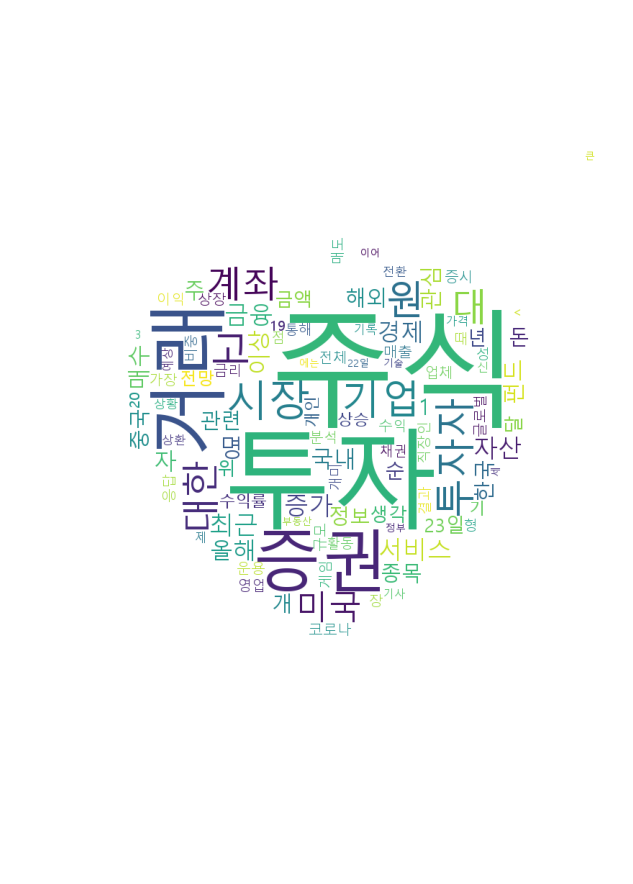

In [31]:
from PIL import Image

import matplotlib.pyplot as plt
from wordcloud import WordCloud
import numpy as np
from PIL import Image
import matplotlib

matplotlib.rcParams['font.family'] = "Maulgun Gothic"
font_path = "c:/Windows/Fonts/malgun.ttf"

# denne_mask = np.array(Image.open('cloud.png'))
custom_mask = np.array (Image.open ( "image.png")) 
wc = WordCloud(font_path=font_path,mask=custom_mask, background_color="white", width=800, height=600)
data = ko.vocab().most_common(100)
print(data)
cloud = wc.generate_from_frequencies(dict(data))
plt.figure(figsize = (20, 16))
plt.axis('off')
plt.imshow(cloud)
plt.savefig('./files/newswordcloud.png')